# 4.10.2 Code Etiquette & Excel Reporting

## Part II.

#### A. Importing libraries and datasets

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing datasets
path = r'C:\Users\Kid\01.2024 Instacart Basket Analysis Project'
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'instacart_dataset.pkl'))
df_deps = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'departments_wrangled.csv'))

In [3]:
#checking output
df.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2398795       1             2                   3                  7   
2    473747       1             3                   3                 12   
3   2254736       1             4                   4                  7   
4    431534       1             5                   4                 15   

   days_since_prior_order  first_order  product_id  add_to_cart_order  \
0                     NaN         True         196                  1   
1                    15.0        False         196                  1   
2                    21.0        False         196                  1   
3                    29.0        False         196                  1   
4                    28.0        False         196                  1   

   reordered  ... orders_frequency        regularity_flag  gender    state  \
0          0  ...             20.5  Non-frequent customer  Female  Alabama   
1          1  ...             20.5  Non-frequent customer  Female  Alabama   
2          1  ...             20.5  Non-frequent customer  Female  Alabama   
3          1  ...             20.5  Non-frequent customer  Female  Alabama   
4          1  ...             20.5  Non-frequent customer  Female  Alabama   

  age n_dependants fam_status income  region low_activity_customer  
0  31            3    married  40423   South                 False  
1  31            3    married  40423   South                 False  
2  31            3    married  40423   South                 False  
3  31            3    married  40423   South                 False  
4  31            3    married  40423   South                 False  

[5 rows x 32 columns]

In [4]:
#renaming department_id column
df_deps = df_deps.rename(columns={'Unnamed: 0' : 'department_id'})

In [5]:
df_deps.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

> #### a. Merging datasets

In [6]:
df = df.merge(df_deps, on = 'department_id')

In [7]:
#checking output
df['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

#### B. Customer profiling and classification

> #### a. Deriving age group variable

In [8]:
df.loc[df['age'] < 30, 'age_group'] = 'Young adult'

In [9]:
df.loc[(df['age'] >= 30) & (df['age'] < 60), 'age_group'] = 'Adult'

In [10]:
df.loc[df['age'] >= 60, 'age_group'] = 'Senior'

In [11]:
#checking age group values frequency
df['age_group'].value_counts(dropna=False)

age_group
Adult          14572457
Senior         10574504
Young adult     5817603
Name: count, dtype: int64

> #### b. Deriving demographic flag variable

In [12]:
df.loc[(df['age_group'] == 'Young adult') & (df['fam_status'].isin(['single', 'living with parents and siblings']))
& (df['n_dependants'] >= 0), 'demographic_flag'] = 'Single young adult'

In [13]:
df.loc[(df['age_group'] == 'Young adult') & (df['fam_status'] == 'married') & (df['n_dependants'] > 0),
'demographic_flag'] = 'Young parent'

In [14]:
df.loc[(df['age_group'] == 'Adult') & (df['fam_status'].isin(['single', 'divorced/widowed'])) & (df['n_dependants'] == 0),
'demographic_flag'] = 'Single adult'

In [15]:
df.loc[(df['age_group'] == 'Adult') & (df['fam_status'] == 'married') & (df['n_dependants'] > 0),
'demographic_flag'] = 'Average parent'

In [16]:
df.loc[(df['age_group'] == 'Senior') & (df['fam_status'].isin(['single', 'divorced/widowed'])) & (df['n_dependants'] == 0),
'demographic_flag'] = 'Single senior'

In [17]:
df.loc[(df['age_group'] == 'Senior') & (df['fam_status'] == 'married') & (df['n_dependants'] > 0),
'demographic_flag'] = 'Senior parent'

In [18]:
#checking profile flag values frequency
df['demographic_flag'].value_counts(dropna=False)

demographic_flag
Average parent        10925665
Senior parent          7929233
Single adult           3646792
Single young adult     2928790
Young parent           2888813
Single senior          2645271
Name: count, dtype: int64

> #### c. Deriving earnings flag variable

In [19]:
df.loc[df['income'] < 50000, 'earnings_flag'] = 'low income'

In [20]:
df.loc[(df['income'] >= 50000) & (df['income'] < 150000), 'earnings_flag'] = 'regular income'

In [21]:
df.loc[df['income'] >= 150000, 'earnings_flag'] = 'high income'

In [22]:
#checking income flag values frequency
df['earnings_flag'].value_counts(dropna=False)

earnings_flag
regular income    23706735
high income        3895275
low income         3362554
Name: count, dtype: int64

> #### d. Visualizing ordering habit by age group and family status

##### > Visualizing age groups distribution

Text(0.5, 1.05, 'Customers distribution by age group')

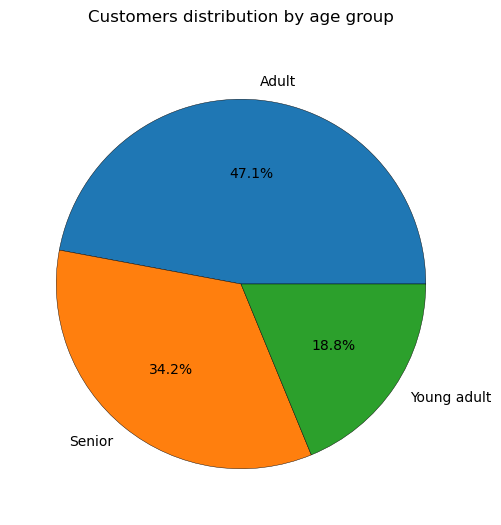

In [23]:
pie = df['age_group'].value_counts().plot(kind='pie', y='age_group', figsize=(10, 6), autopct='%1.1f%%',
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True})
pie.set_ylabel(None)
pie.set_title('Customers distribution by age group', y=1.05)

In [24]:
#exporting chart
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_groups_distribution_pie.png'))

##### > Visualizing famliy status distribution

Text(0.5, 1.05, 'Customer distribution by family status')

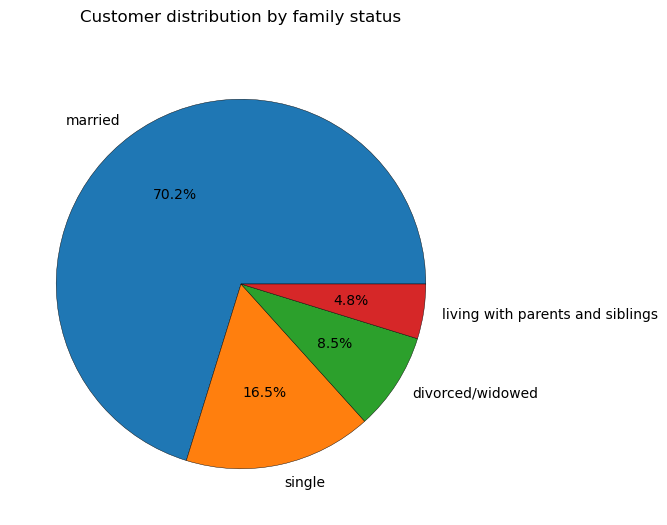

In [25]:
pie = df['fam_status'].value_counts().plot(kind='pie', y='age_group', figsize=(10, 6), autopct='%1.1f%%',
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True})
pie.set_ylabel(None)
pie.set_title('Customer distribution by family status', y=1.05)

In [26]:
#exporting chart
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_status_distribution_pie.png'))

In [27]:
#crossing family status and age
cross_fam_status_age = pd.crosstab(df['fam_status'], df['age_group'])

In [28]:
cross_fam_status_age

age_group                            Adult   Senior  Young adult
fam_status                                                      
divorced/widowed                         0  2645271            0
living with parents and siblings         0        0      1481172
married                           10925665  7929233      2888813
single                             3646792        0      1447618

Text(0.5, 1.05, 'Orders frequency by family status and age group')

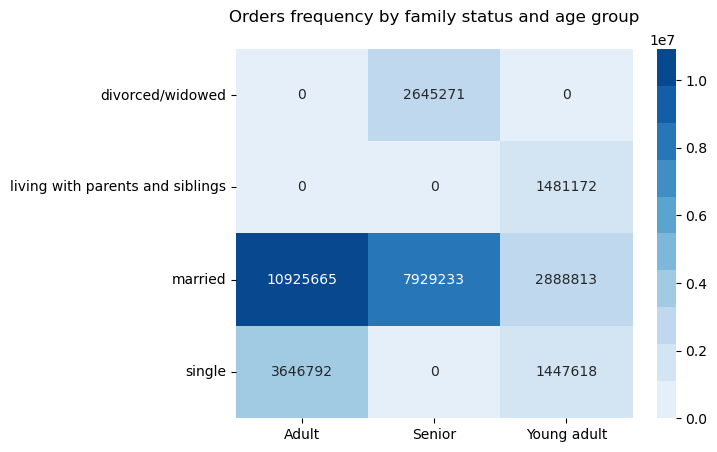

In [29]:
#visualizing orders frequency by age group and family status
heat = sns.heatmap(cross_fam_status_age, cmap=sns.color_palette("Blues", 10), annot=True, fmt="0.0f")
heat.set_xlabel(None)
heat.set_ylabel(None)
heat.set_title('Orders frequency by family status and age group', y= 1.05)

In [30]:
#exporting chart
heat.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'ords_freq_family_status_age_heat.png'), bbox_inches='tight')

##### > Usage frequency by age groups

In [31]:
cross_age_freq = pd.crosstab(df['days_since_prior_order'], df['age_group'])

Text(0.5, 1.05, 'Usage frequency by age groups')

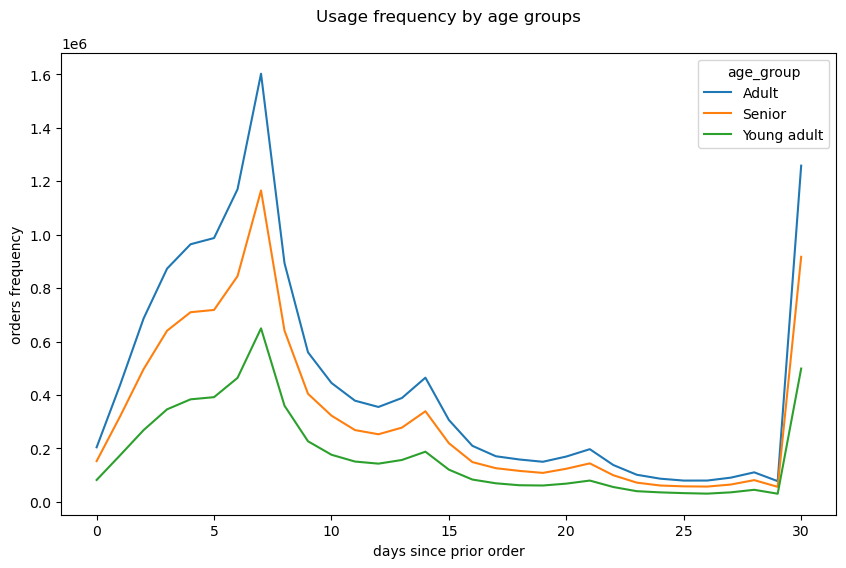

In [32]:
line = cross_age_freq.plot(kind='line', figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Usage frequency by age groups', y=1.05)

In [33]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_usage_frequency_line.png'))

##### > Daily orders by age groups

In [34]:
cross_age_daily_orders = pd.crosstab(df['orders_day_of_week'], df['age_group'])

Text(0.5, 1.05, 'Daily orders by age groups')

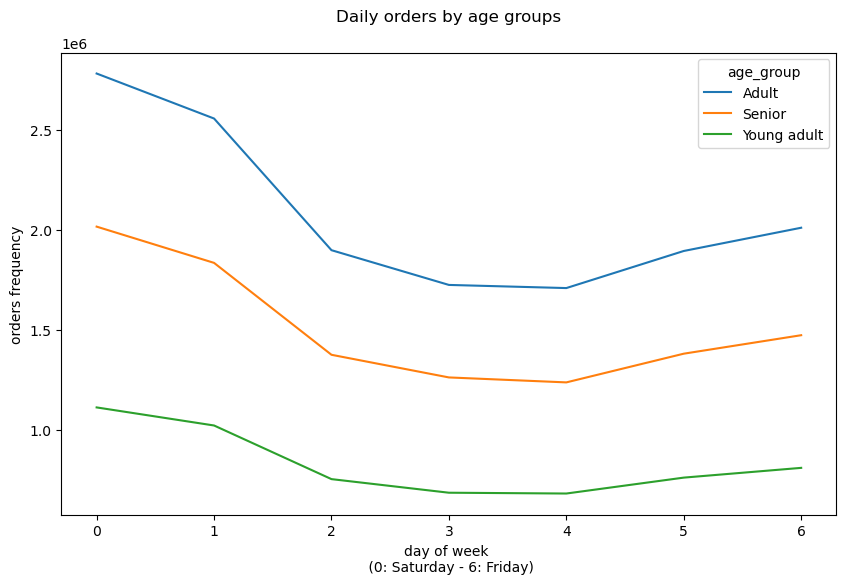

In [35]:
line = cross_age_daily_orders.plot(kind='line', figsize=(10, 6))
line.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
line.set_ylabel('orders frequency')
line.set_title('Daily orders by age groups', y=1.05)

In [36]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_daily_orders_line.png'))

##### > Hourly orders by age groups

In [37]:
cross_age_hourly_orders = pd.crosstab(df['order_hour_of_day'], df['age_group'])

Text(0.5, 1.05, 'Hourly orders by age groups')

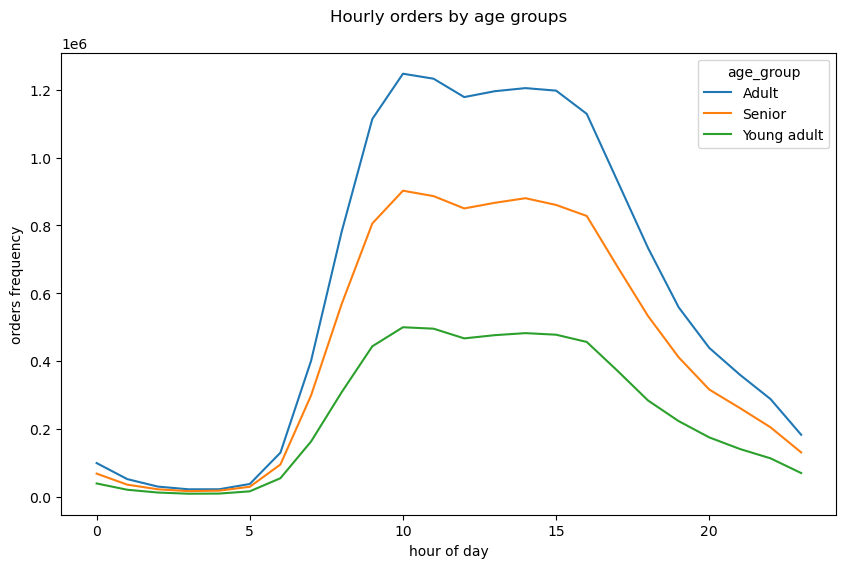

In [38]:
line = cross_age_hourly_orders.plot(kind='line', figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('orders frequency')
line.set_title('Hourly orders by age groups', y=1.05)

In [39]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_hourly_orders_line.png'))

##### > Usage frequency by family status

In [40]:
cross_fam_freq = pd.crosstab(df['days_since_prior_order'], df['fam_status'])

Text(0.5, 1.05, 'Usage frequency by family status')

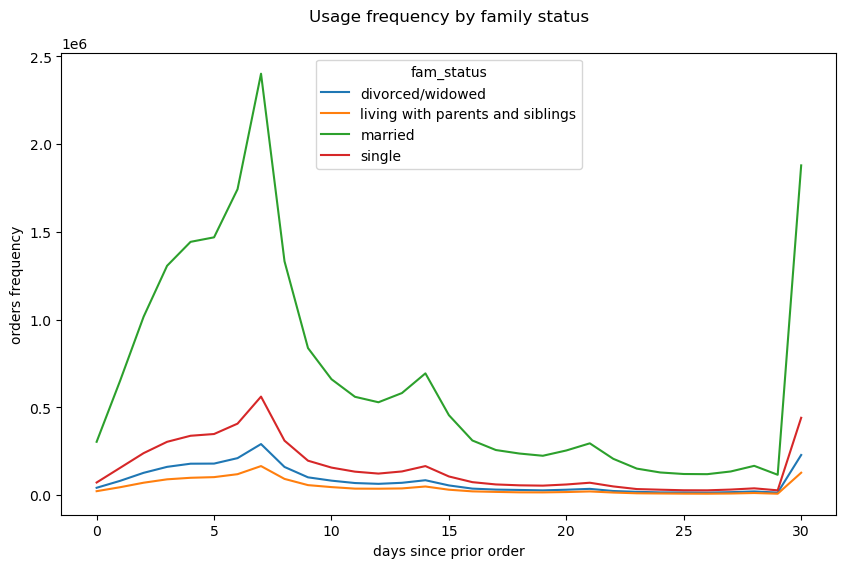

In [41]:
line = cross_fam_freq.plot(kind='line', figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Usage frequency by family status', y=1.05)

In [42]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_usage_frequency_line.png'))

##### > Daily orders by family status

In [43]:
cross_family_daily_orders = pd.crosstab(df['orders_day_of_week'], df['fam_status'])

Text(0.5, 1.05, 'Daily orders by family status')

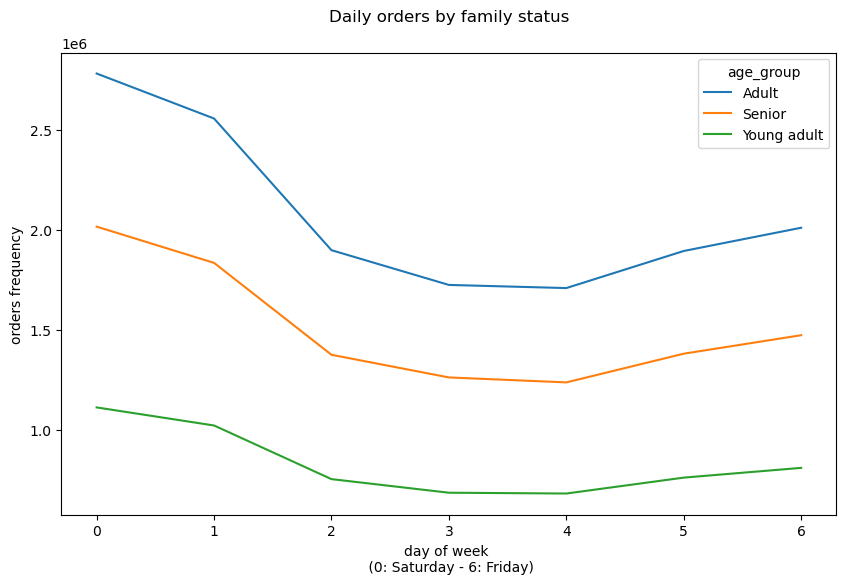

In [44]:
line = cross_age_daily_orders.plot(kind='line', figsize=(10, 6))
line.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
line.set_ylabel('orders frequency')
line.set_title('Daily orders by family status', y=1.05)

In [45]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_daily_orders_line.png'))

##### > Hourly orders by family status

In [46]:
cross_family_hourly_orders = pd.crosstab(df['order_hour_of_day'], df['fam_status'])

Text(0.5, 1.05, 'Hourly orders by family status')

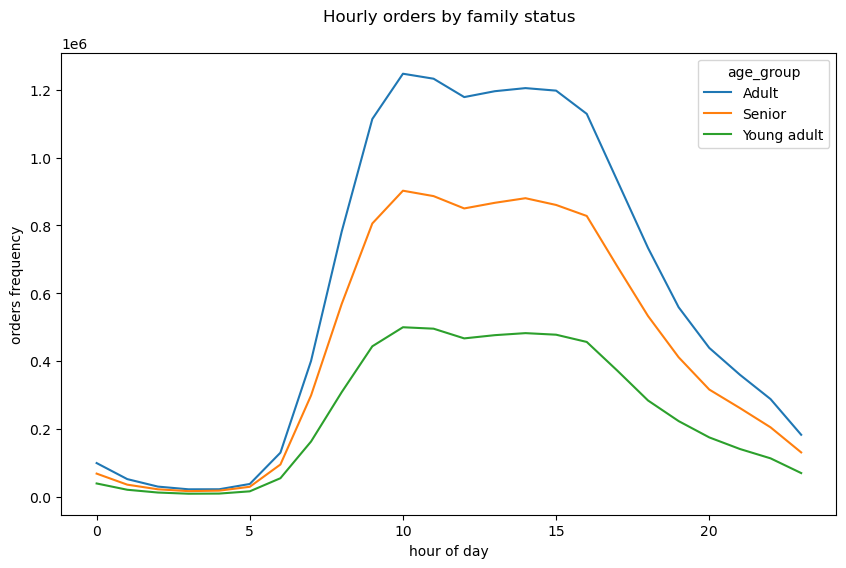

In [47]:
line = cross_age_hourly_orders.plot(kind='line', figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('orders frequency')
line.set_title('Hourly orders by family status', y=1.05)

In [48]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_hourly_orders_line.png'))

In [49]:
#avg prices by family status
df.groupby('fam_status')['prices'].agg(['min', 'max', 'mean'])

min      max       mean
fam_status                                               
divorced/widowed                  1.0  99999.0  11.532741
living with parents and siblings  1.0  99999.0  10.890167
married                           1.0  99999.0  11.944390
single                            1.0  99999.0  12.398586

In [50]:
#avg prices by age
df.groupby('age_group')['prices'].agg(['min', 'max', 'mean'])

min      max       mean
age_group                           
Adult        1.0  99999.0  11.979373
Senior       1.0  99999.0  11.724449
Young adult  1.0  99999.0  12.198693

In [51]:
#handling odd max values
df.loc[df['prices'] > 100, 'prices'] = np.nan

#### Observations:


##### Most Instacart orders comes from married individuals across all age groups. This indicates that there is a connection between age and family status in terms of ordering frequency.

##### The two variables, however, don't seem to affect customers' oredering and spending habit. We can see that customers across different age groups and family status tend to have similar spending on average. More on this later when we'll factor in the number of dependants as well.

> #### e. Visualizing demographic profiles distribution

Text(0.5, 1.0, 'Demographic profiles distribution')

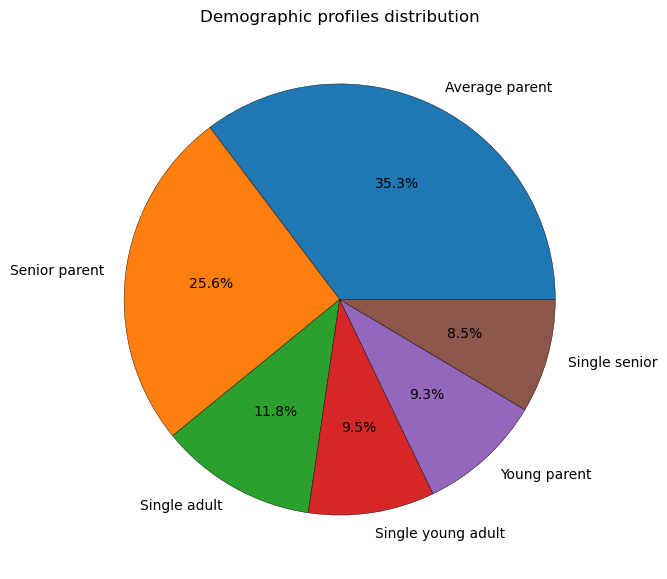

In [52]:
pie = df['demographic_flag'].value_counts().plot(kind='pie', y='profile_flag', autopct='%1.1f%%',
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True}, figsize = (10, 7))
pie.set_ylabel(None)
pie.set_title('Demographic profiles distribution')

In [53]:
#exporting chart
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_profiles_distribution_pie.png'))

#### Observations:

##### Average parent and senior parent customer groups make up the most of Instacart customer base followed by single adult, sngle young adult, young parent and single senior groups. 

> #### f. Visualizing income profiles distribution

Text(0.5, 1.0, 'Income profiles distribution')

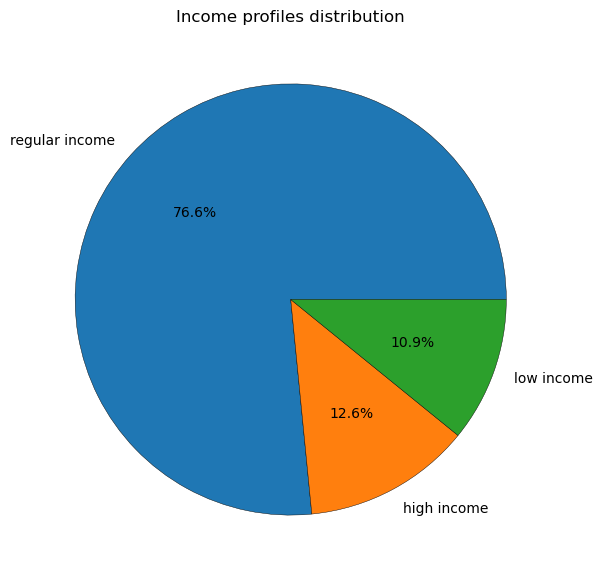

In [54]:
pie = df['earnings_flag'].value_counts().plot(kind='pie', y='earnings_flag', autopct='%1.1f%%', 
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True}, figsize = (10, 7))
pie.set_ylabel(None)
pie.set_title('Income profiles distribution')

In [55]:
#exporting chart
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_profiles_distribution_pie.png'))

#### Observations:

##### The largest proportion — 76.6%, of Instacart customer base has a regular income. Customers with high income make up only 12.6%, while customers with low income make up 10.9%.

> #### g. Visualizing demographic profiles distribution by income

In [56]:
#crossing demographic and earnings flags
cross_demographic_income = pd.crosstab(df['demographic_flag'], df['earnings_flag'])

In [57]:
cross_demographic_income.sort_values(by=['regular income'], ascending=False)

earnings_flag       high income  low income  regular income
demographic_flag                                           
Average parent          1359658     1191930         8374077
Senior parent           1494408      662250         5772575
Single adult             470960      398257         2777575
Single young adult        26670      458495         2443625
Young parent              29232      440912         2418669
Single senior            514347      210710         1920214

Text(0.5, 1.05, 'Demographic profiles distribution by income')

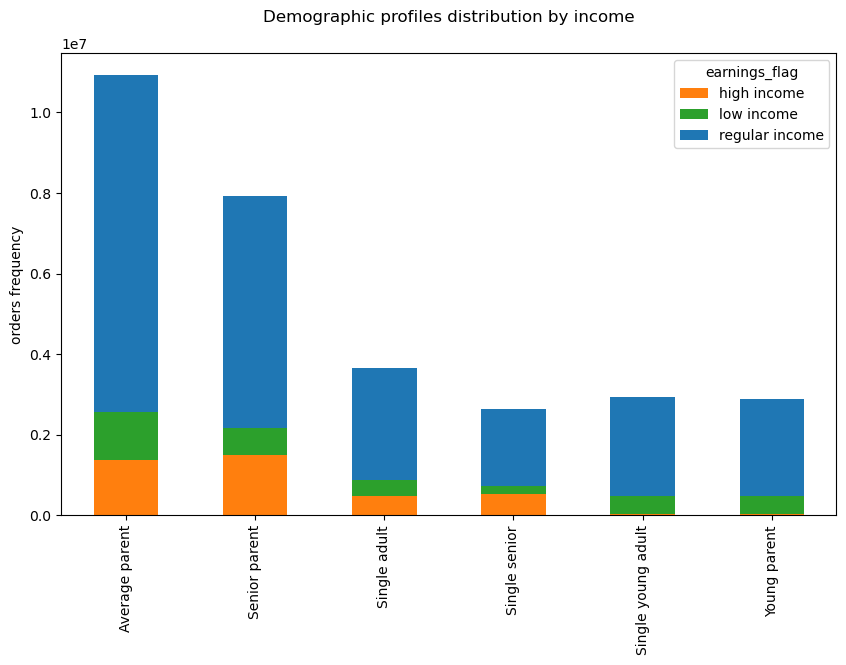

In [58]:
bar = cross_demographic_income.plot(kind = 'bar', stacked=True, color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize = (10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Demographic profiles distribution by income', y=1.05)

In [59]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_profile_distribution_income_bar.png'), bbox_inches='tight')

#### Observations:

##### Here, we can see the distribution of demographic groups by income, which as expected, mostly have regular income. 

##### We notice that single young adult and young parent customer groups have the least high income earnings among all demographics.

> #### h. Analyzing demographic profiles ordering habits
>> #### i. Customers loyalty

Text(0.5, 1.0, 'Customers loyalty')

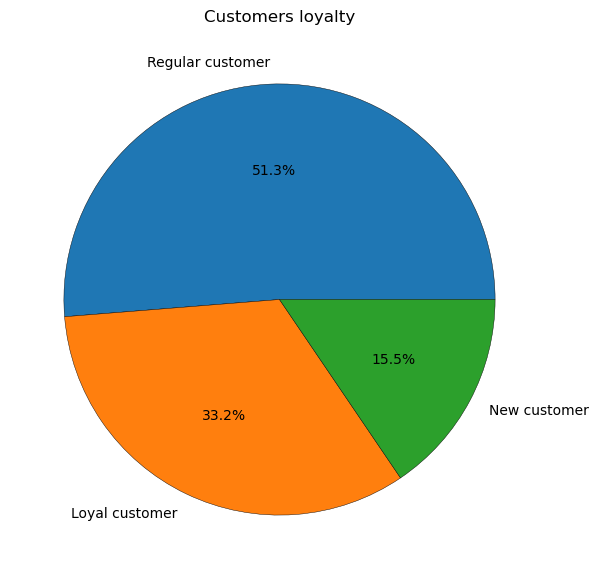

In [60]:
#visualizing customer loyalty
pie = df['loyalty_flag'].value_counts().plot(kind='pie', y='loyalty_flag', autopct='%1.1f%%', 
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True}, figsize = (10, 7))
pie.set_ylabel(None)
pie.set_title('Customers loyalty')

In [61]:
#exporting chart
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'customers_loyalty_pie.png'))

##### > Customers loyalty by demographic groups

In [62]:
#crossing loyalty and demographic flags
cross_demographic_loyalty = pd.crosstab(df['demographic_flag'], df['loyalty_flag'])

In [63]:
cross_demographic_loyalty

loyalty_flag        Loyal customer  New customer  Regular customer
demographic_flag                                                  
Average parent             3621189       1688674           5615802
Senior parent              2632051       1246194           4050988
Single adult               1234874        564613           1847305
Single senior               882722        403781           1358768
Single young adult          963997        454650           1510143
Young parent                949260        445783           1493770

Text(0.5, 1.05, 'Demographic profiles loyalty')

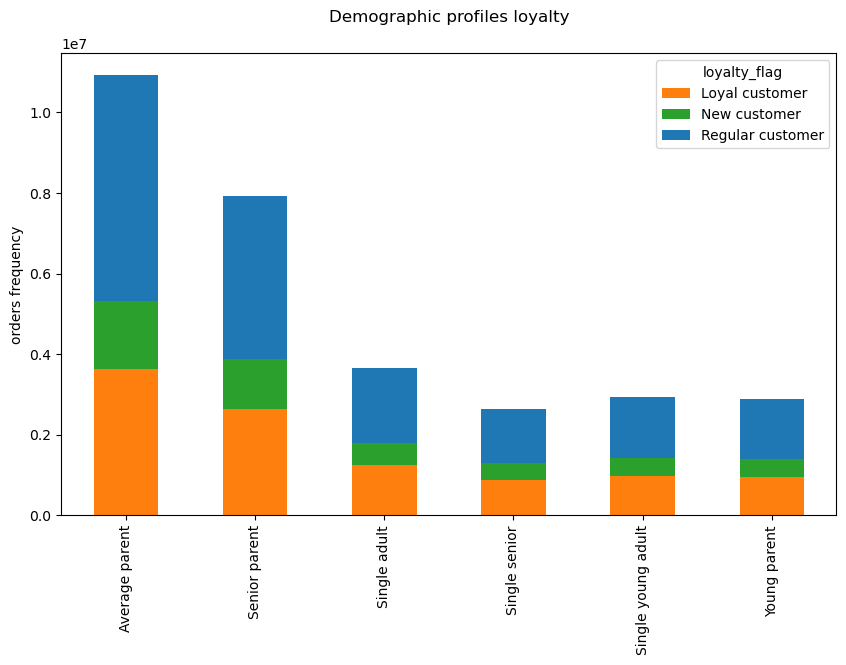

In [64]:
bar = cross_demographic_loyalty.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Demographic profiles loyalty', y=1.05)

#### Observations:

##### The largest proportion of Instacart's customer base is comprised of regular customers. 

##### Average parent and senior parent customer groups are the top most loyal customers to the brand.

In [65]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_profile_loyalty_bar.png'), bbox_inches='tight')

>> #### ii. Customers regularity

Text(0.5, 1.0, 'Customers regularity')

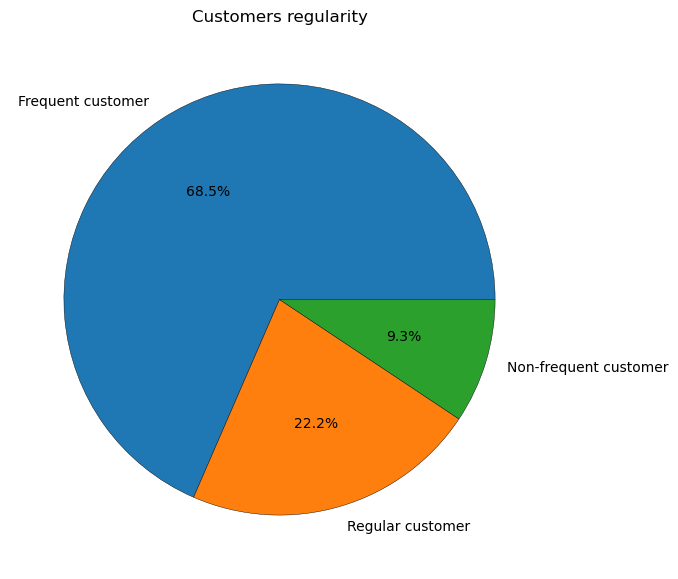

In [66]:
#visualizing customers regularity
pie = df['regularity_flag'].value_counts().plot(kind='pie', y='regularity_flag', autopct='%1.1f%%', 
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True}, figsize = (10, 7))
pie.set_ylabel(None)
pie.set_title('Customers regularity')

In [67]:
#exporting chart
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'customers_regularity_pie.png'))

##### > Customers Regularity by demographic groups

In [68]:
#crossing demographic and regularity flags
cross_demographic_regular = pd.crosstab(df['demographic_flag'], df['regularity_flag'])

In [69]:
cross_demographic_regular

regularity_flag     Frequent customer  Non-frequent customer  Regular customer
demographic_flag                                                              
Average parent                7469329                1029691           2426645
Senior parent                 5433095                 746604           1749534
Single adult                  2489179                 334951            822662
Single senior                 1819123                 243934            582214
Single young adult            2007349                 276267            645174
Young parent                  1986401                 263528            638884

Text(0.5, 1.05, 'Customers regularity by demographic groups')

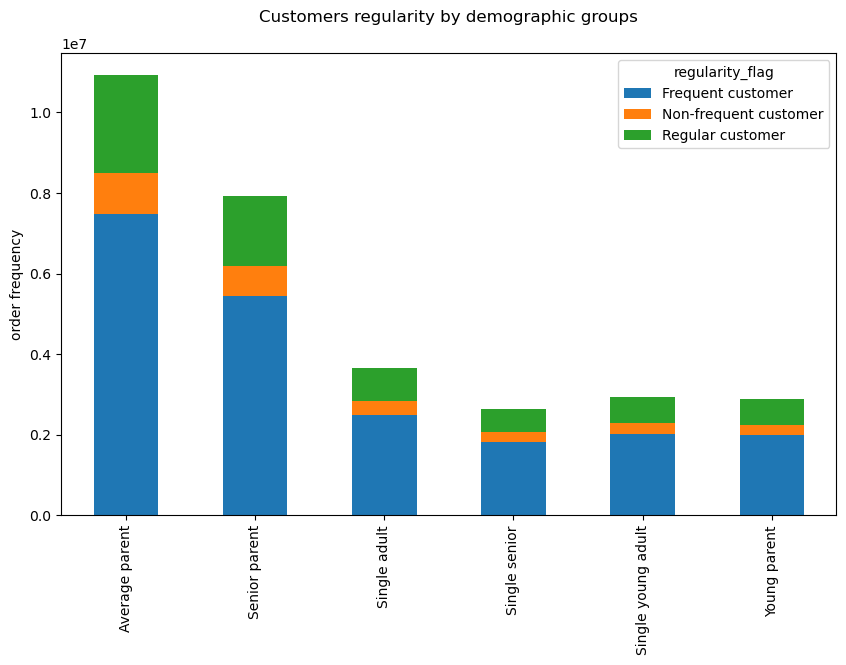

In [70]:
#visualizing regularity by demographic groups
bar = cross_demographic_regular.plot(kind='bar', stacked=True, figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('order frequency')
bar.set_title('Customers regularity by demographic groups', y=1.05)

In [71]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_regularity_bar.png'), bbox_inches='tight')

#### Observations:

##### Most of Instacart users are classified as frequent customers across all demographics groups. We're also starting to notice a common pattern between the distribution of said groups in terms of loyalty, regularity, as well as ordering and spending habit, as we will demonstrate next.

>> #### iii. Usage frequency

In [72]:
order_freq = df.groupby('days_since_prior_order')['order_number'].size()

Text(0.5, 1.05, 'Usage frequency')

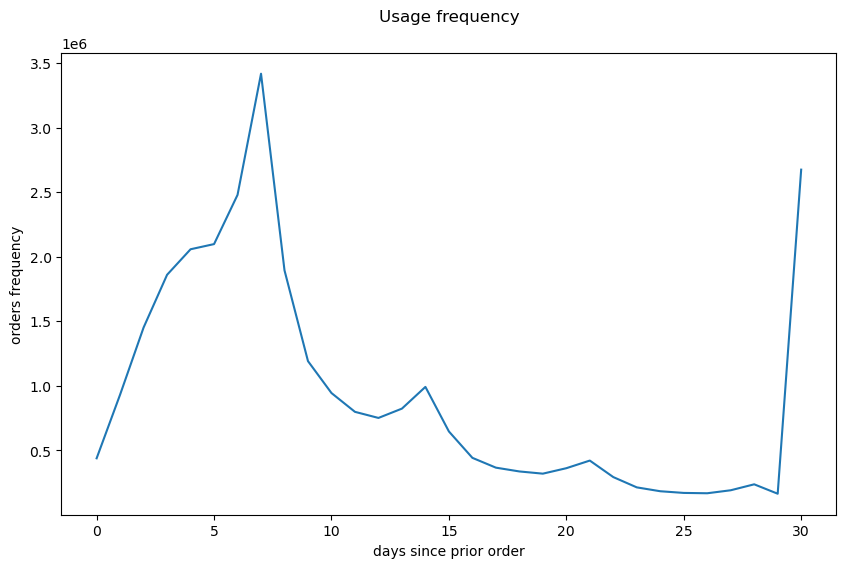

In [73]:
#visualizing usage frequency - line
line = order_freq.plot(kind='line', figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Usage frequency', y=1.05)

Text(0.5, 1.05, 'Usage frequency')

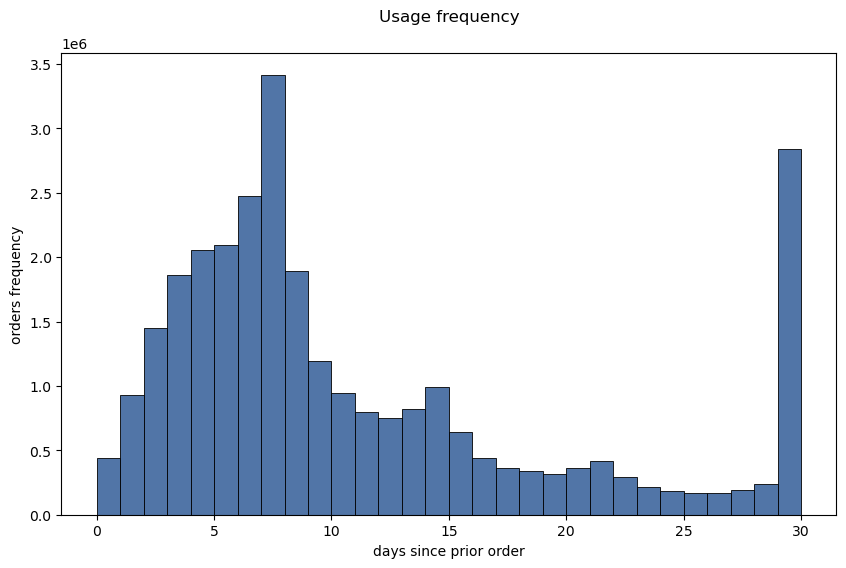

In [74]:
#visualizing usage frequency - histogram
hist = df['days_since_prior_order'].plot(kind='hist', figsize=(10, 6), color=['#5175A7'], 
edgecolor='black', linewidth=0.6, bins = 30)
hist.set_xlabel('days since prior order')
hist.set_ylabel('orders frequency')
hist.set_title('Usage frequency', y=1.05)

In [75]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'usage_frequency_line.png'))

In [76]:
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'usage_frequency_hist.png'))

##### > Usage frequency by demographic groups

In [77]:
df.groupby('demographic_flag')['days_since_prior_order'].agg(['min', 'max', 'mean'])

min   max       mean
demographic_flag                        
Average parent      0.0  30.0  10.829788
Senior parent       0.0  30.0  10.817469
Single adult        0.0  30.0  10.771922
Single senior       0.0  30.0  10.750328
Single young adult  0.0  30.0  10.833769
Young parent        0.0  30.0  10.796514

In [78]:
#crossing usage frequency and demographics
cross_demographic_ords_freq = pd.crosstab(df['days_since_prior_order'], df['demographic_flag'])

In [79]:
cross_demographic_ords_freq.head()

demographic_flag        Average parent  Senior parent  Single adult  \
days_since_prior_order                                                
0.0                             152395         110971         51610   
1.0                             326248         239018        111253   
2.0                             512327         370047        174031   
3.0                             653805         480004        219210   
4.0                             721079         531170        243106   

demographic_flag        Single senior  Single young adult  Young parent  
days_since_prior_order                                                   
0.0                             41326               41706         40003  
1.0                             80890               88223         86058  
2.0                            126534              134850        133579  
3.0                            160589              173553        172653  
4.0                            178557              192941        190670

Text(0.5, 1.05, 'Demographic profiles usage frequency')

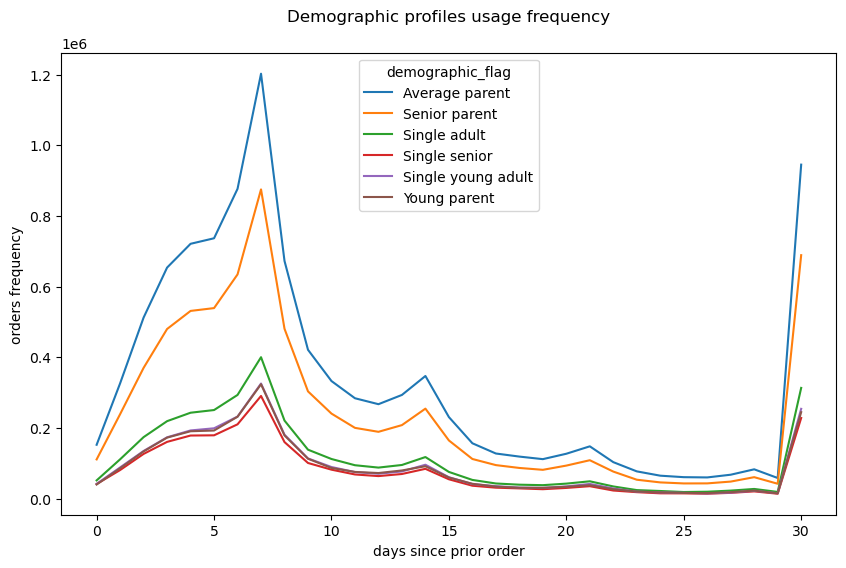

In [80]:
#visualizing usage frequency
line = cross_demographic_ords_freq.plot(kind='line', figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Demographic profiles usage frequency', y=1.05)

In [81]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_orders_frequency_line.png'))

#### Observations:

##### Instacart customers' usage frequency follows a common and recurring pattern across all demographic groups.

##### Most orders occur within 7 to 8 days prior to previous orders. We also see a resurgence in orders occuring within 30 days from the previous ones across all demographic groups.

##### > Daily orders frequency

In [82]:
daily_order_freq = df.groupby('orders_day_of_week')['order_number'].size()

Text(0.5, 1.05, 'Daily orders frequency')

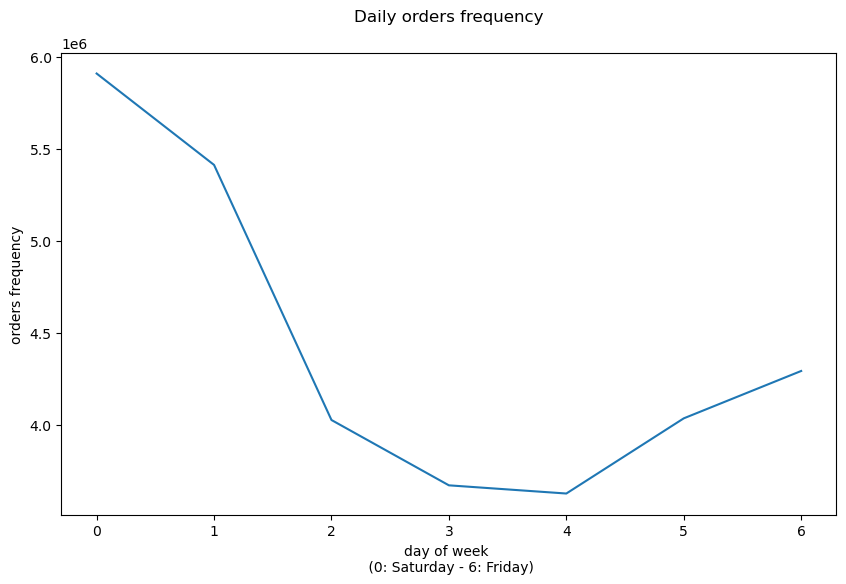

In [83]:
#visualizing daily orders frequency - line
line = daily_order_freq.plot(kind='line', figsize=(10, 6))
line.set_ylabel('orders frequency')
line.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
line.set_title('Daily orders frequency', y=1.05)

Text(0.5, 1.05, 'Daily orders frequency')

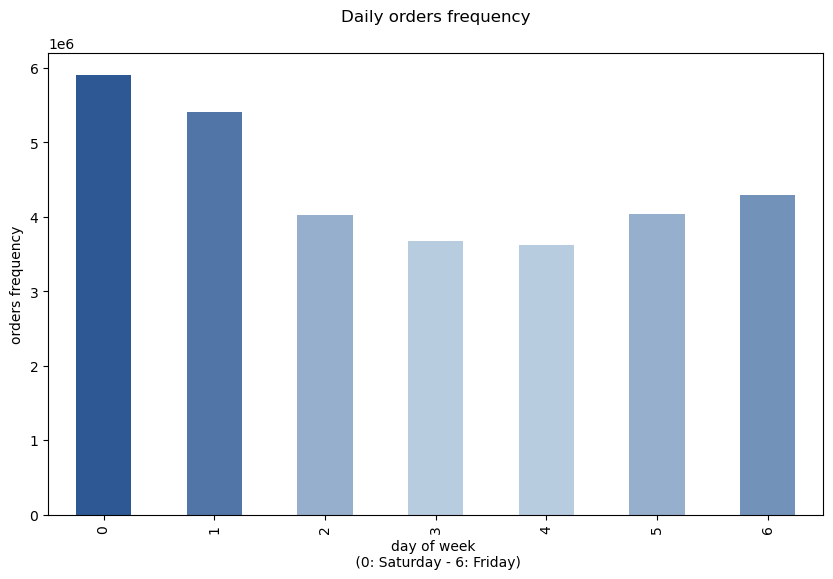

In [84]:
#visualizing daily orders frequency - bar
bar = daily_order_freq.plot(kind='bar', color = ['#2E5894', '#5175A7', '#96AFCD', '#B8CCE0', '#B8CCE0', '#96AFCD', '#7392BA'],
figsize=(10, 6))
bar.set_ylabel('orders frequency')
bar.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
bar.set_title('Daily orders frequency', y=1.05)

In [86]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'daily_orders_frequency_line.png'))

In [85]:
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'daily_orders_frequency_bar.png'))

##### > Daily orders frequency by demographic profiles

In [87]:
df.groupby('demographic_flag')['orders_day_of_week'].agg(['min', 'max', 'mean'])

min  max      mean
demographic_flag                      
Average parent        0    6  2.739872
Senior parent         0    6  2.745449
Single adult          0    6  2.729155
Single senior         0    6  2.751114
Single young adult    0    6  2.737537
Young parent          0    6  2.746508

In [88]:
#crossing demographics and daily orders frequency
cross_demographic_dow = pd.crosstab(df['orders_day_of_week'], df['demographic_flag'])

In [89]:
cross_demographic_dow

demographic_flag    Average parent  Senior parent  Single adult  \
orders_day_of_week                                                
0                          2082062        1513210        699681   
1                          1914968        1375156        641620   
2                          1424924        1030655        472906   
3                          1291816         945857        432192   
4                          1281472         929663        426812   
5                          1413771        1031534        480081   
6                          1516652        1103158        493500   

demographic_flag    Single senior  Single young adult  Young parent  
orders_day_of_week                                                   
0                          502506              555719        555432  
1                          459198              521014        499730  
2                          343839              378202        374180  
3                          315320              343948        340402  
4                          306704              344957        335386  
5                          348434              381119        378790  
6                          369270              403831        404893

Text(0.5, 1.05, 'daily orders frequency by demographic groups')

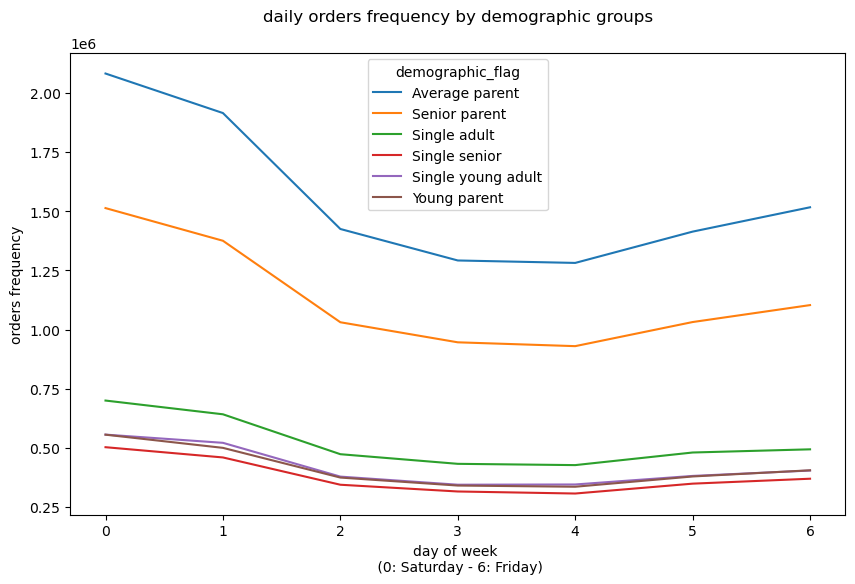

In [90]:
#visualizing daily orders frequency
line = cross_demographic_dow.plot(kind='line', figsize=(10, 6))
line.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
line.set_ylabel('orders frequency')
line.set_title('daily orders frequency by demographic groups', y=1.05)

In [91]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_daily_orders_line.png'))

#### Observations:

##### Customers' daily orders frequency also follows the same recurring pattern across all demographic groups.

##### Most Instacart orders occur on Saturday and Sunday, then significantly drop on Monday through Wednesday before jumping back up on Thursday.

##### > Hourly orders frequency

In [92]:
hourly_order_freq = df.groupby('order_hour_of_day')['order_number'].size()

Text(0.5, 1.05, 'Hourly orders frequency')

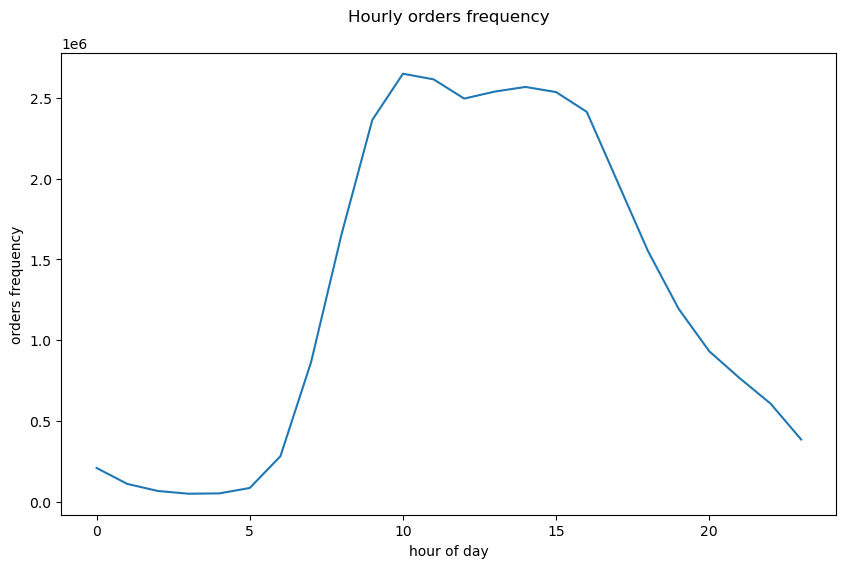

In [93]:
#visualizing hourly orders frequency - line
line = hourly_order_freq.plot(kind='line', figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('orders frequency')
line.set_title('Hourly orders frequency', y=1.05)

Text(0.5, 1.05, 'Hourly orders frequency')

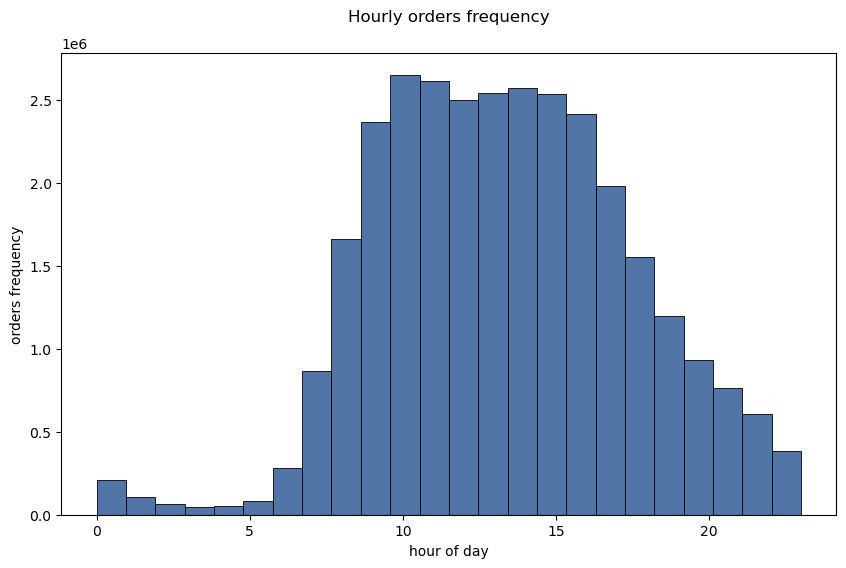

In [94]:
#visualizing hourly orders frequency - histogram
hist = df['order_hour_of_day'].plot(kind='hist', figsize=(10, 6), color=['#5175A7'], 
edgecolor='black', linewidth=0.6, bins = 24)
hist.set_xlabel('hour of day')
hist.set_ylabel('orders frequency')
hist.set_title('Hourly orders frequency', y=1.05)

In [95]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hourly_orders_line.png'))

In [96]:
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hourly_orders_hist.png'))

##### > Hourly orders frequency by demographic groups

In [97]:
df.groupby('demographic_flag')['order_hour_of_day'].agg(['min', 'max', 'mean'])

min  max       mean
demographic_flag                       
Average parent        0   23  13.414737
Senior parent         0   23  13.410960
Single adult          0   23  13.417974
Single senior         0   23  13.429982
Single young adult    0   23  13.407169
Young parent          0   23  13.374474

In [98]:
#crossing demographics and hourly orders frequency
cross_demographic_hod = pd.crosstab(df['order_hour_of_day'], df['demographic_flag'])

In [99]:
cross_demographic_hod

demographic_flag   Average parent  Senior parent  Single adult  Single senior  \
order_hour_of_day                                                               
0                           74338          52523         25416          16150   
1                           39253          27495         13208           8582   
2                           22793          16259          7584           6174   
3                           16600          12564          5803           4443   
4                           16635          14425          5896           3997   
5                           28785          22071          9348           7774   
6                           97543          71946         32828          23577   
7                          299364         221744        101498          77304   
8                          584212         426056        197622         142533   
9                          835089         606231        278720         199662   
10                         938730         677969        308523         224486   
11                         925630         664648        306913         221881   
12                         885879         637884        292509         212321   
13                         897740         650339        297989         216484   
14                         904244         661337        300598         219032   
15                         897059         643903        300363         216572   
16                         840572         620022        288382         207995   
17                         697941         510354        233506         168536   
18                         551802         402978        181999         130188   
19                         420032         307237        138878         104313   
20                         329739         234933        109411          81476   
21                         271044         195499         88990          66363   
22                         214823         153025         73486          52060   
23                         135818          97791         47322          33368   

demographic_flag   Single young adult  Young parent  
order_hour_of_day                                    
0                               20525         19090  
1                               10497         10586  
2                                6463          6418  
3                                4665          4721  
4                                5106          4704  
5                                8499          7941  
6                               29331         25788  
7                               83498         79805  
8                              151619        157068  
9                              222001        221908  
10                             249554        250482  
11                             248067        247741  
12                             234337        232865  
13                             239434        237290  
14                             242940        239752  
15                             241098        236971  
16                             229844        226866  
17                             190046        181962  
18                             144335        139882  
19                             113789        109629  
20                              87345         88005  
21                              71179         70036  
22                              57760         55906  
23                              36858         33397

Text(0.5, 1.05, 'Demographic profiles hourly orders frequency')

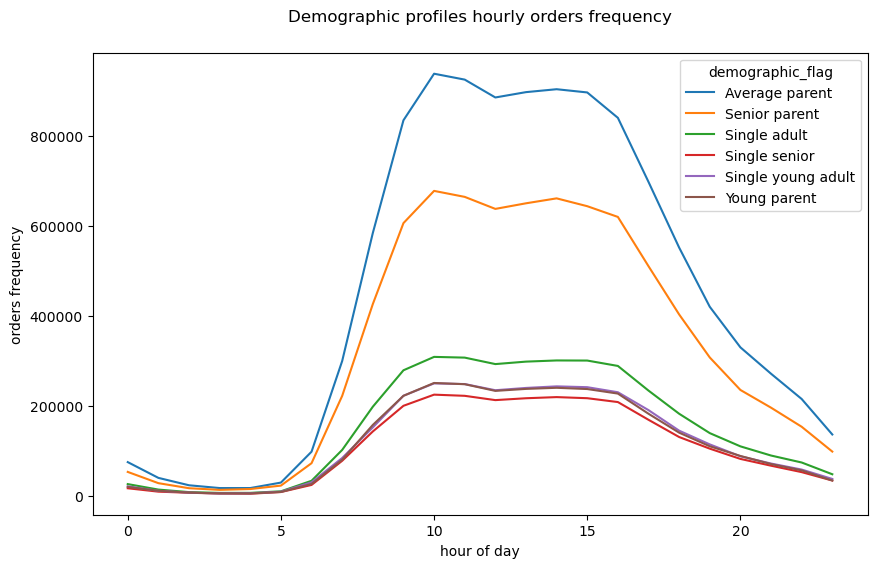

In [100]:
#visualizing hourly orders frequency
line = cross_demographic_hod.plot(kind='line', figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('orders frequency')
line.set_title('Demographic profiles hourly orders frequency', y=1.05)

In [101]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_hourly_orders_line.png'))

#### Observations:

##### Similarily, customers' hourly orders frequency also follows the same pattern for all demographic groups.

##### Most orders orccur between 8am and 4pm, followed by a significant decline on evening time.

>> #### v. Departments and product types
>>> #### 1. Prices summary

Text(0.5, 1.05, 'Prices distribution')

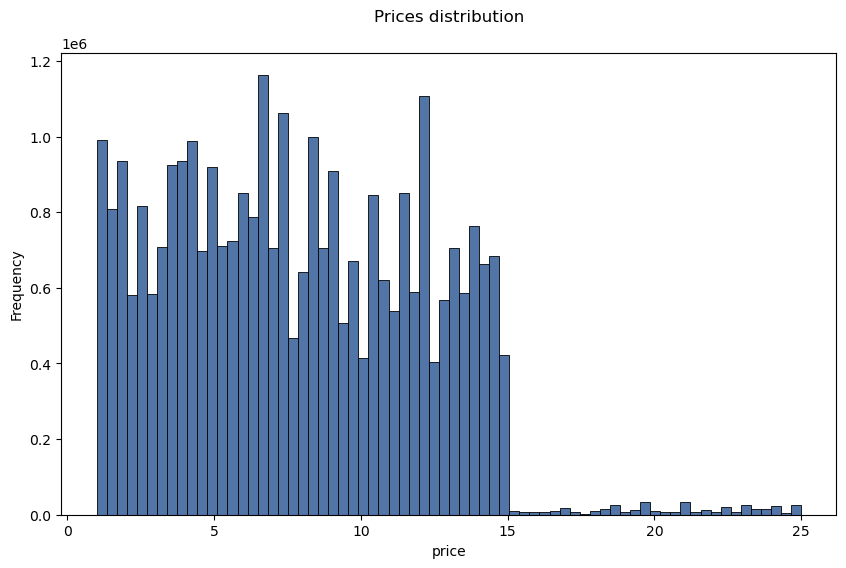

In [102]:
#visualizing prices distribution
hist = df['prices'].plot(kind='hist', figsize=(10, 6), color=['#5175A7'], 
edgecolor='black', linewidth=0.6, bins = 70)
hist.set_xlabel('price')
hist.set_title('Prices distribution', y=1.05)

In [103]:
#exporting chart
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_distribution_hist.png'))

In [104]:
cross_income_demographic = pd.crosstab(df['prices'], df['demographic_flag'])

Text(0.5, 1.05, 'order prices by demographic groups')

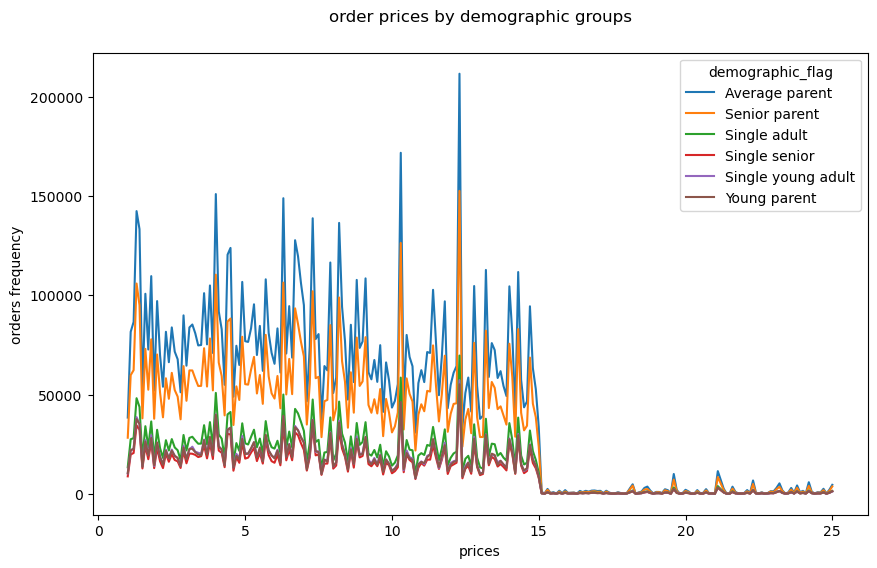

In [105]:
#visualizing prices by demographic groups
line = cross_income_demographic.plot(kind='line', figsize=(10, 6))
line.set_xlabel('prices')
line.set_ylabel('orders frequency')
line.set_title('order prices by demographic groups', y=1.05)

In [106]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_prices_distribution_line.png'))

#### Observations:

##### At first glance, we can already tell that customers of all demographic groups share the same spending habits as well. 

##### Coming up, we'll be analyzing the top products, departments and the price range of such products across all demographic groups. 

>>> #### 2. Spending distribution

Text(0.5, 1.0, 'Spending distribution')

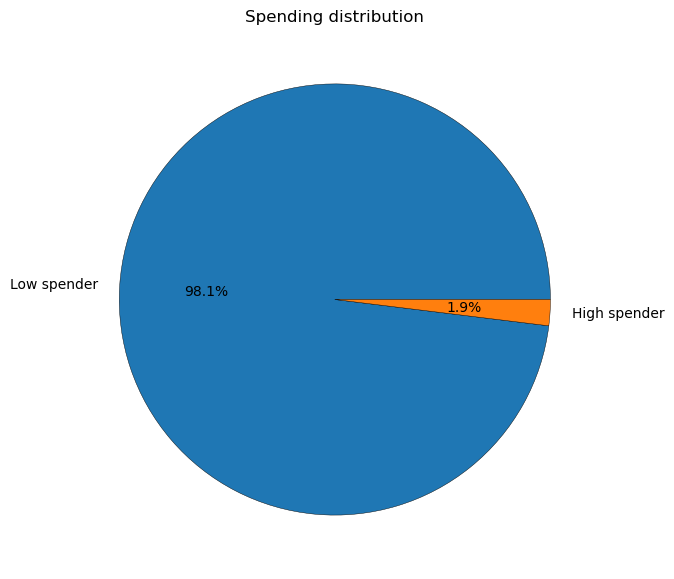

In [107]:
pie = df['spending_flag'].value_counts().plot(kind='pie', y='spending', autopct='%1.1f%%', 
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True}, figsize = (10, 7))
pie.set_ylabel(None)
pie.set_title('Spending distribution')

In [108]:
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'spending_distribution_pie.png'))

##### > Spending distribution by demographic groups

In [109]:
#crossing demographics and spending flags
cross_demographic_spending = pd.crosstab(df['demographic_flag'], df['spending_flag'])

In [110]:
cross_demographic_spending

spending_flag       High spender  Low spender
demographic_flag                             
Average parent            214987     10710678
Senior parent             156847      7772386
Single adult               72369      3574423
Single senior              50321      2594950
Single young adult         51278      2877512
Young parent               57623      2831190

Text(0.5, 1.05, 'Demographic groups spending distribution')

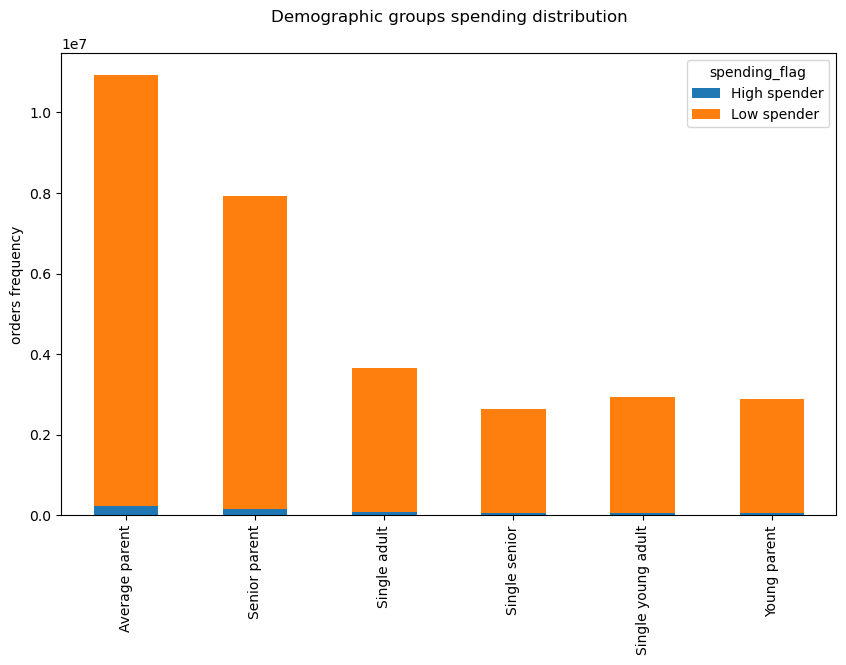

In [111]:
#visualizing spending habit
bar = cross_demographic_spending.plot(kind='bar', stacked=True, figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Demographic groups spending distribution', y=1.05)

In [112]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_spending_distribution_bar.png'), bbox_inches='tight')

Text(0.5, 1.05, 'High spenders distribution by demographic groups')

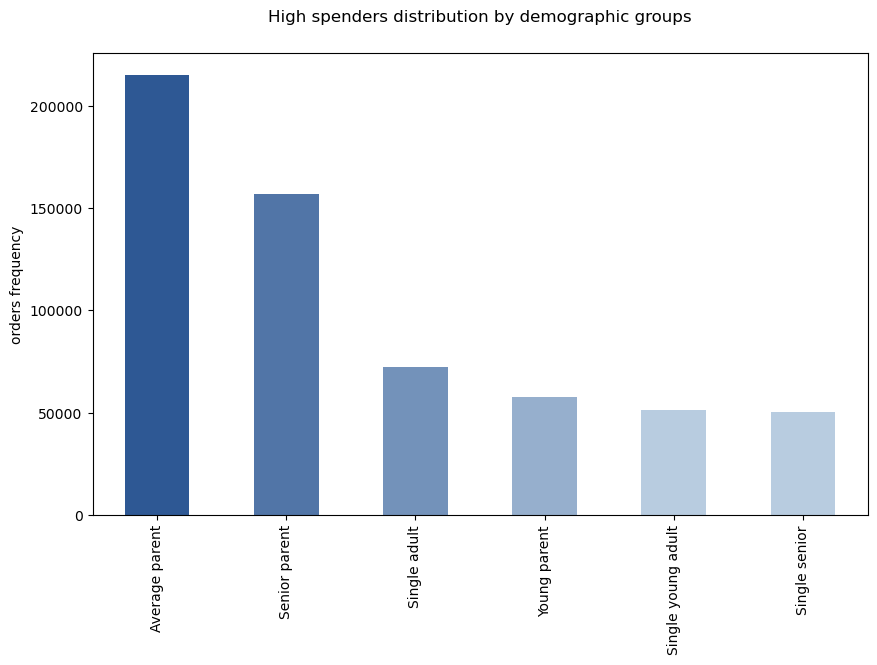

In [113]:
#visualizing high spenders by demographic groups
bar_high_spender = cross_demographic_spending['High spender'].sort_values(ascending=False).plot(kind='bar',
color=['#2E5894', '#5175A7', '#7392BA', '#96AFCD', '#B8CCE0', '#B8CCE0'], figsize=(10, 6))
bar_high_spender.set_xlabel(None)
bar_high_spender.set_ylabel('orders frequency')
bar_high_spender.set_title('High spenders distribution by demographic groups', y=1.05)

In [114]:
#exporting chart
bar_high_spender.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_high_spenders_distribution_bar.png'), bbox_inches='tight')

#### Observations:

##### As we've seen in Part I., the largest proportion of Instacart customers are classified as low spenders. We've also seen that there's a large gap between customers in terms of their spending distribution. Here, spending distribution follows the same pattern across all demographic groups as well, where average parent and senior parent customer groups are topping the Instacart spending chart.

>>> #### 3. Products price range

Text(0.5, 1.0, 'Products price range')

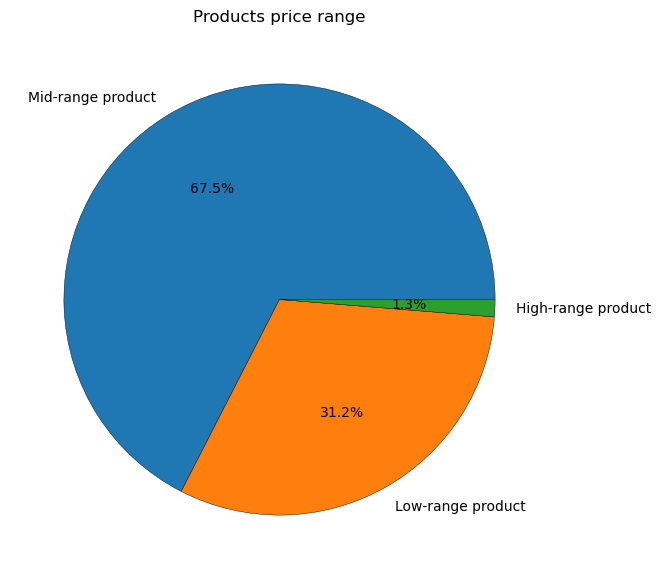

In [115]:
#visualizing products price range
pie = df['price_range'].value_counts().plot(kind='pie', y='spending', autopct='%1.1f%%', 
wedgeprops = {"edgecolor" : "black", 'linewidth': 0.3, 'antialiased': True}, figsize = (10, 7))
pie.set_ylabel(None)
pie.set_title('Products price range')

In [116]:
pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'products_price_range.png'))

##### > Products price range by demographic groups

In [117]:
#crossing demographics and price range
cross_demographic_prices = pd.crosstab(df['price_range'], df['demographic_flag'])

In [118]:
cross_demographic_prices

demographic_flag    Average parent  Senior parent  Single adult  \
price_range                                                       
High-range product          141546         102798         45021   
Low-range product          3414889        2475662       1137414   
Mid-range product          7369230        5350773       2464357   

demographic_flag    Single senior  Single young adult  Young parent  
price_range                                                          
High-range product          34134               37297         37157  
Low-range product          826382              917249        903244  
Mid-range product         1784755             1974244       1948412

Text(0.5, 1.05, 'Products price range by demographic groups')

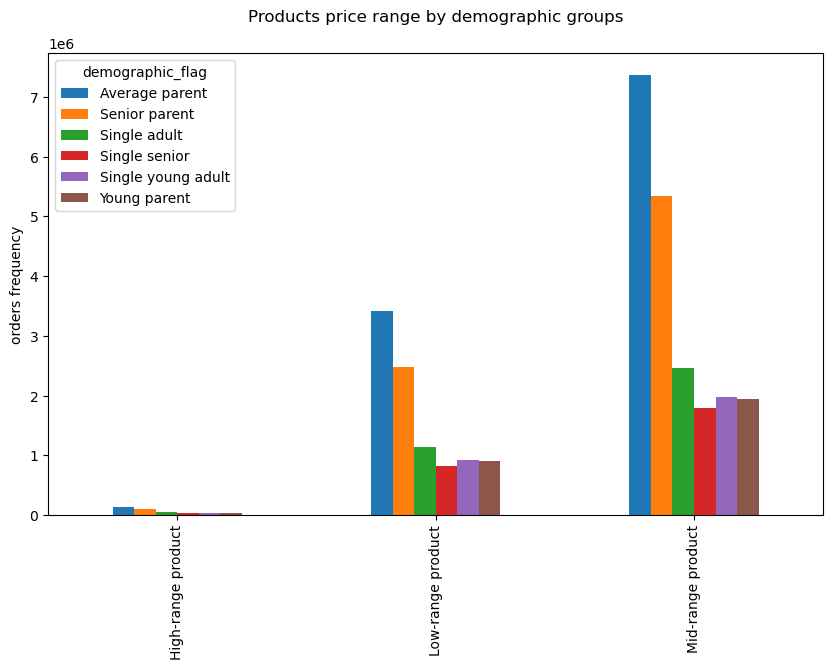

In [119]:
#visualizing products' price range
bar = cross_demographic_prices.plot(kind='bar', figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Products price range by demographic groups', y=1.05)

In [120]:
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_products_price_range_bar.png'), bbox_inches='tight')

#### Observations:
##### The majority of Instacart's ordered products are classified as mid-range products, followed by low-range products. Here again, we see that customers of all demographics groups exhibit the same behaviour in terms their spending habit.

>>> #### 4. Top departments

##### > Top most popular deparments

In [121]:
#orders by department
top_dep = df.groupby('department')['order_number'].sum()

In [122]:
top_dep

department
alcohol              2318982
babies               8153295
bakery              20014199
beverages           46040831
breakfast           11719741
bulk                  695699
canned goods        17138317
dairy eggs          94870281
deli                17210535
dry goods pasta     13674604
frozen              34288740
household           11504889
international        4396567
meat seafood        11185784
missing              1572653
other                 622718
pantry              30891281
personal care        7184940
pets                 1488581
produce            167927778
snacks              49325997
Name: order_number, dtype: int64

Text(0.5, 1.05, 'Top most popular deparments')

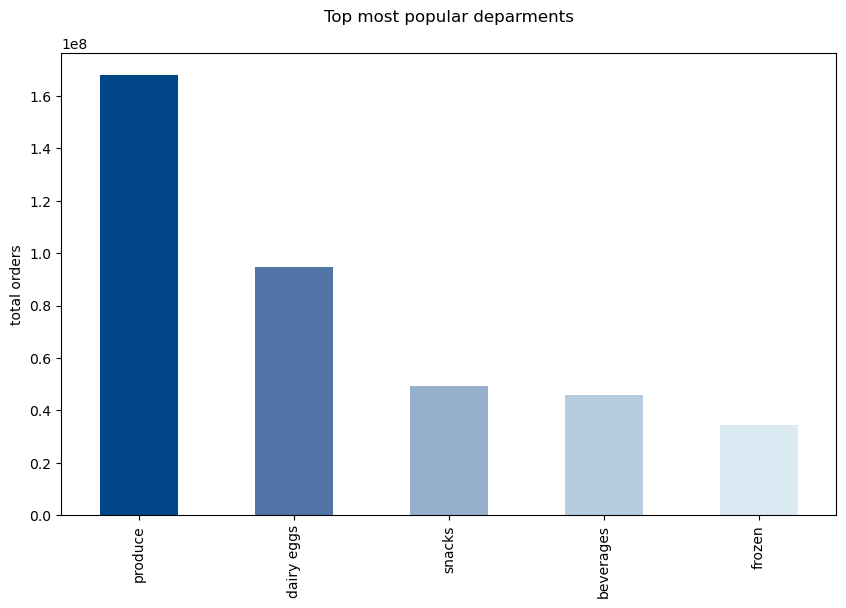

In [123]:
#visualizing top departments
bar = top_dep.sort_values(ascending=False).head(5).plot(kind='bar',
color=['#004687', '#5175A7', '#96AFCD', '#B8CCE0', '#DBE9F3'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('total orders')
bar.set_title('Top most popular deparments', y=1.05)

In [124]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'top_departments_bar.png'), bbox_inches='tight')

#### Observations:

##### Produce and dairy eggs are the most popular departments in terms of total orders, followed by snacks, beverages and frozen departments.

##### > Top most popular deparments by demographic groups

In [125]:
#departments by demographic profiles
cross_demographic_deps = pd.crosstab(df['department'], df['demographic_flag'])

In [126]:
cross_demographic_deps

demographic_flag  Average parent  Senior parent  Single adult  Single senior  \
department                                                                     
alcohol                    50528          35737         18565          11859   
babies                    145364         104387         48532          34351   
bakery                    394607         286711        133417          95735   
beverages                 906611         662790        303966         220879   
breakfast                 236453         171161         78531          56590   
bulk                       11795           8748          3818           2676   
canned goods              356234         260179        119223          84268   
dairy eggs               1827670        1319910        610722         442602   
deli                      352355         256586        119611          86749   
dry goods pasta           291118         209851         95029          70251   
frozen                    745828         545006        248723         183957   
household                 248491         182189         80331          58446   
international              90472          64634         30241          21814   
meat seafood              238539         175131         77106          57621   
missing                    22725          16723          7687           5064   
other                      11729           8762          4222           2842   
pantry                    629853         458070        208698         151891   
personal care             151213         107415         49825          36313   
pets                       32055          23730         11087           8025   
produce                  3202494        2327024       1073230         777094   
snacks                    979531         704489        324228         236244   

demographic_flag  Single young adult  Young parent  
department                                          
alcohol                        14782         13156  
babies                         39826         37932  
bakery                        105927        104431  
beverages                     239603        238052  
breakfast                      64509         63606  
bulk                            3139          3275  
canned goods                   96006         96164  
dairy eggs                    491259        485019  
deli                           95141         93392  
dry goods pasta                78558         77329  
frozen                        199661        198556  
household                      65930         64470  
international                  24800         24030  
meat seafood                   63495         62889  
missing                         6501          6068  
other                           3465          3391  
pantry                        169160        165033  
personal care                  40268         39272  
pets                            9828          8335  
produce                       855656        843775  
snacks                        261276        260638

In [127]:
#sorting top departments
top_deps = cross_demographic_deps.apply(lambda x: x.nlargest(5), axis=0)

In [128]:
top_deps

demographic_flag  Average parent  Senior parent  Single adult  Single senior  \
department                                                                     
produce                  3202494        2327024       1073230         777094   
dairy eggs               1827670        1319910        610722         442602   
snacks                    979531         704489        324228         236244   
beverages                 906611         662790        303966         220879   
frozen                    745828         545006        248723         183957   

demographic_flag  Single young adult  Young parent  
department                                          
produce                       855656        843775  
dairy eggs                    491259        485019  
snacks                        261276        260638  
beverages                     239603        238052  
frozen                        199661        198556

Text(0.5, 1.05, 'Top most popular departments by demographic groups')

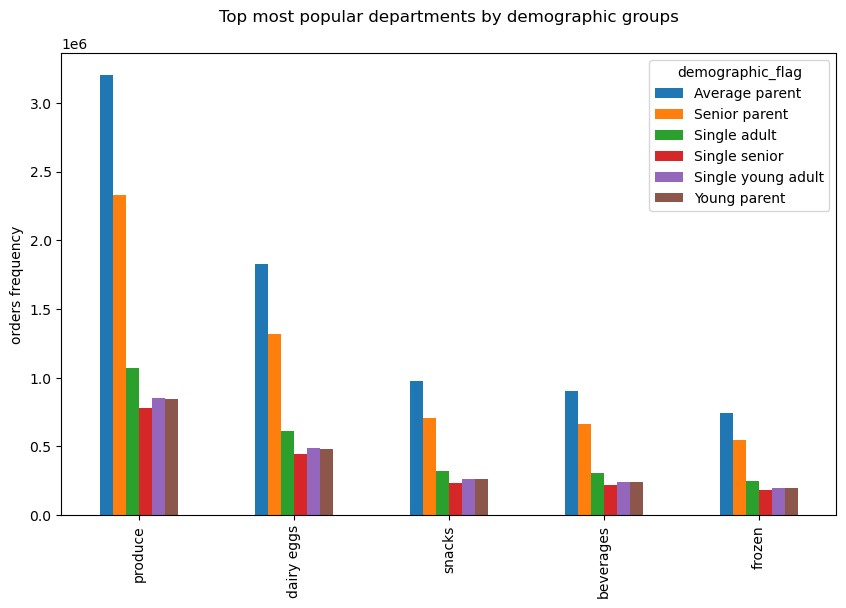

In [129]:
#visualizing top departments
bar = top_deps.plot(kind='bar', figsize=(10, 6))
bar.set_ylabel('orders frequency')
bar.set_xlabel(None)
bar.set_title('Top most popular departments by demographic groups', y=1.05)

In [130]:
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'demographic_top_departments_bar.png'), bbox_inches='tight')

#### Observations:

##### Here again, we see the same recurring pattern among all demographic groups in terms of ordered products. Based on the graph, average parent and senior parent groups are driving products sales by a large margin across all Instacart deparments, followed by single adult group. Whereas single young adult and young parent groups almost have the same number of ordered products across all departments. 

>>> #### 5. Top products

In [131]:
#orders by products
top_prods = df.groupby('product_name')['order_number'].sum()

In [132]:
top_prods

product_name
#2 Coffee Filters                                                  14954
#2 Cone White Coffee Filters                                         216
#2 Mechanical Pencils                                                136
#4 Natural Brown Coffee Filters                                     4351
#NAME?                                                               364
                                                                   ...  
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum     1227
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum            858
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum              1392
with a Splash of Mango Coconut Water                                 290
with a Splash of Pineapple Coconut Water                             942
Name: order_number, Length: 49630, dtype: int64

Text(0.5, 1.05, 'Top most popular products')

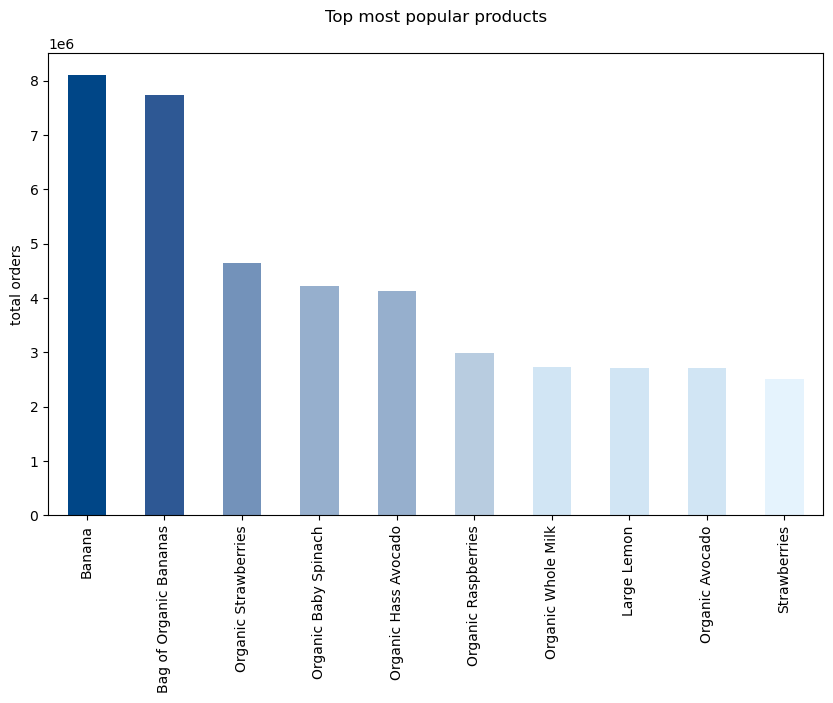

In [133]:
#visualizing top products
bar = top_prods.sort_values(ascending=False).head(10).plot(kind='bar',
color=['#004687', '#2E5894', '#7392BA', '#96AFCD', '#96AFCD', '#B8CCE0', '#D1E5F4', '#D1E5F4', '#D1E5F4', '#E5F3FD']
, figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('total orders')
bar.set_title('Top most popular products', y=1.05)

In [134]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'top_products.png'), bbox_inches='tight')

#### Observations:

##### Bananas and Bag of Organic Bananas are the top most ordered Instacart products, followed by Organic Strawberries, Organic Baby Spinach and Organic Hass Avocado, and lastly Organic Raspberries, Organic Whole Milk, Large Lemon, Organic Avocado and Strawberries.

##### > Top most popular products by demographic groups

In [135]:
#orders by demographic groups and products
df_top_products = df.groupby(['demographic_flag','product_name'])['order_number'].sum()

In [136]:
df_top_products

demographic_flag  product_name                                                   
Average parent    #2 Coffee Filters                                                  5701
                  #2 Cone White Coffee Filters                                         17
                  #2 Mechanical Pencils                                                28
                  #4 Natural Brown Coffee Filters                                    2280
                  #NAME?                                                              126
                                                                                     ... 
Young parent      with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum       8
                  with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum           227
                  with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum              140
                  with a Splash of Mango Coconut Water                                 12
                  

In [137]:
#generating a dataframe with each value turned into a column
df_top_products = df_top_products.unstack(level=0)

In [138]:
df_top_products

demographic_flag                                    Average parent  \
product_name                                                         
#2 Coffee Filters                                           5701.0   
#2 Cone White Coffee Filters                                  17.0   
#2 Mechanical Pencils                                         28.0   
#4 Natural Brown Coffee Filters                             2280.0   
#NAME?                                                       126.0   
...                                                            ...   
with Xylitol Unwrapped Original Flavor 50 Stick...           285.0   
with Xylitol Unwrapped Spearmint 50 Sticks Suga...           109.0   
with Xylitol Watermelon Twist 18 Sticks Sugar F...           295.0   
with a Splash of Mango Coconut Water                         143.0   
with a Splash of Pineapple Coconut Water                     110.0   

demographic_flag                                    Senior parent  \
product_name                                                        
#2 Coffee Filters                                          3370.0   
#2 Cone White Coffee Filters                                 60.0   
#2 Mechanical Pencils                                        66.0   
#4 Natural Brown Coffee Filters                             515.0   
#NAME?                                                       43.0   
...                                                           ...   
with Xylitol Unwrapped Original Flavor 50 Stick...          906.0   
with Xylitol Unwrapped Spearmint 50 Sticks Suga...          309.0   
with Xylitol Watermelon Twist 18 Sticks Sugar F...          537.0   
with a Splash of Mango Coconut Water                         53.0   
with a Splash of Pineapple Coconut Water                    166.0   

demographic_flag                                    Single adult  \
product_name                                                       
#2 Coffee Filters                                         1734.0   
#2 Cone White Coffee Filters                                46.0   
#2 Mechanical Pencils                                        NaN   
#4 Natural Brown Coffee Filters                            345.0   
#NAME?                                                      28.0   
...                                                          ...   
with Xylitol Unwrapped Original Flavor 50 Stick...           NaN   
with Xylitol Unwrapped Spearmint 50 Sticks Suga...         148.0   
with Xylitol Watermelon Twist 18 Sticks Sugar F...         227.0   
with a Splash of Mango Coconut Water                        13.0   
with a Splash of Pineapple Coconut Water                    77.0   

demographic_flag                                    Single senior  \
product_name                                                        
#2 Coffee Filters                                          1011.0   
#2 Cone White Coffee Filters                                 85.0   
#2 Mechanical Pencils                                         8.0   
#4 Natural Brown Coffee Filters                             290.0   
#NAME?                                                      105.0   
...                                                           ...   
with Xylitol Unwrapped Original Flavor 50 Stick...            9.0   
with Xylitol Unwrapped Spearmint 50 Sticks Suga...           21.0   
with Xylitol Watermelon Twist 18 Sticks Sugar F...           61.0   
with a Splash of Mango Coconut Water                         15.0   
with a Splash of Pineapple Coconut Water                     18.0   

demographic_flag                                    Single young adult  \
product_name                                                             
#2 Coffee Filters                                               1455.0   
#2 Cone White Coffee Filters                                       8.0   
#2 Mechanical Pencils                                              5.0   
#4 Natural Brown Coffee Filters       

In [139]:
#sorting top products
df_top_products = df_top_products.nlargest(10, columns=['Average parent', 'Senior parent', 'Single adult', 'Single senior',
'Single young adult', 'Young parent'])

In [140]:
df_top_products

demographic_flag        Average parent  Senior parent  Single adult  \
product_name                                                          
Banana                       2866811.0      2032744.0      953406.0   
Bag of Organic Bananas       2685747.0      2012862.0      926633.0   
Organic Strawberries         1634752.0      1197241.0      542026.0   
Organic Baby Spinach         1485721.0      1076237.0      511021.0   
Organic Hass Avocado         1441611.0      1070340.0      516707.0   
Organic Raspberries          1031309.0       758522.0      344660.0   
Organic Avocado               988344.0       663475.0      323796.0   
Large Lemon                   969182.0       681913.0      328548.0   
Organic Whole Milk            961737.0       686901.0      336831.0   
Strawberries                  897053.0       634193.0      302700.0   

demographic_flag        Single senior  Single young adult  Young parent  
product_name                                                             
Banana                       705302.0            805019.0      736771.0  
Bag of Organic Bananas       680511.0            704503.0      724500.0  
Organic Strawberries         409963.0            425162.0      434625.0  
Organic Baby Spinach         358009.0            392434.0      394680.0  
Organic Hass Avocado         360141.0            357134.0      386444.0  
Organic Raspberries          277129.0            278133.0      294750.0  
Organic Avocado              232217.0            241407.0      262470.0  
Large Lemon                  229354.0            256363.0      246683.0  
Organic Whole Milk           231129.0            267563.0      251874.0  
Strawberries                 198354.0            240938.0      242523.0

Text(0.5, 1.05, 'Top most popular products by demographic groups')

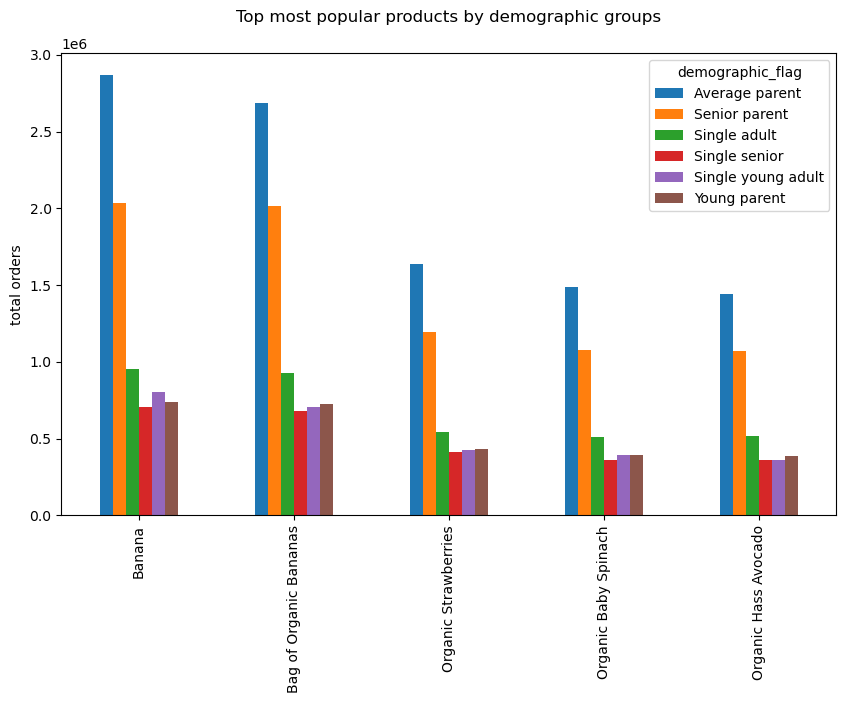

In [141]:
#visualizing top 5 products
df_top_5_products = df_top_products.nlargest(5, columns=['Average parent', 'Senior parent', 'Single adult', 'Single senior',
'Single young adult', 'Young parent'])
bar = df_top_5_products.plot(kind='bar', figsize=(10, 6))
bar.set_ylabel('total orders')
bar.set_xlabel(None)
bar.set_title('Top most popular products by demographic groups', y=1.05)

> ###### NOTE: The number of products was simplified to 5 instead of 10 for clarity purposes. 

In [142]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'top_products_demographic_bar.png'), bbox_inches='tight')

#### Observations:

##### The chart above is yet another example showing the similar behaviour Instacart customers are exhibiting in terms of products preferences across all demographic groups.

> #### i. Analyzing income profiles ordering habits
>> #### i. Customers loyalty

In [143]:
#crossing earnings and loyatly flags
cross_earnings_loyalty = pd.crosstab(df['earnings_flag'], df['loyalty_flag'])

In [144]:
cross_earnings_loyalty

loyalty_flag    Loyal customer  New customer  Regular customer
earnings_flag                                                 
high income            1310941        575479           2008855
low income             1032934        627180           1702440
regular income         7940218       3601036          12165481

Text(0.5, 1.05, 'Customers loyalty by income')

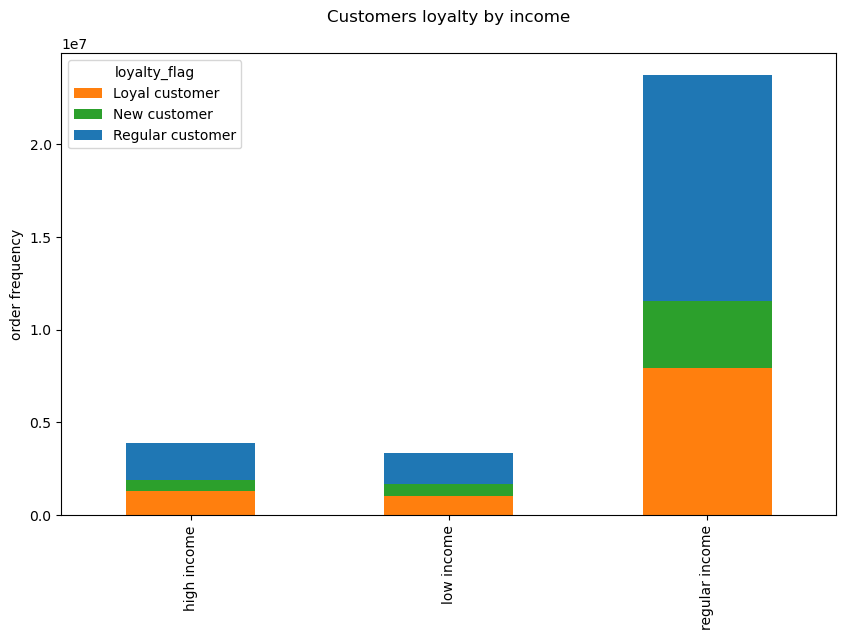

In [145]:
#visualizing customer loyalty
bar = cross_earnings_loyalty.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('order frequency')
bar.set_title('Customers loyalty by income', y=1.05)

In [146]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_earnings_bar.png'), bbox_inches='tight')

#### Observations:

##### Regular income customers are the most loyal to the Instacart brand among all earners.

>> #### ii. Customers regularity

In [147]:
#crossing earnings and regularity flags
cross_earnings_regular = pd.crosstab(df['earnings_flag'], df['regularity_flag'])

In [148]:
cross_earnings_regular

regularity_flag  Frequent customer  Non-frequent customer  Regular customer
earnings_flag                                                              
high income                2700205                 345292            849778
low income                 2199082                 376138            787334
regular income            16305189                2173545           5228001

Text(0.5, 1.05, 'Customers regularity by income')

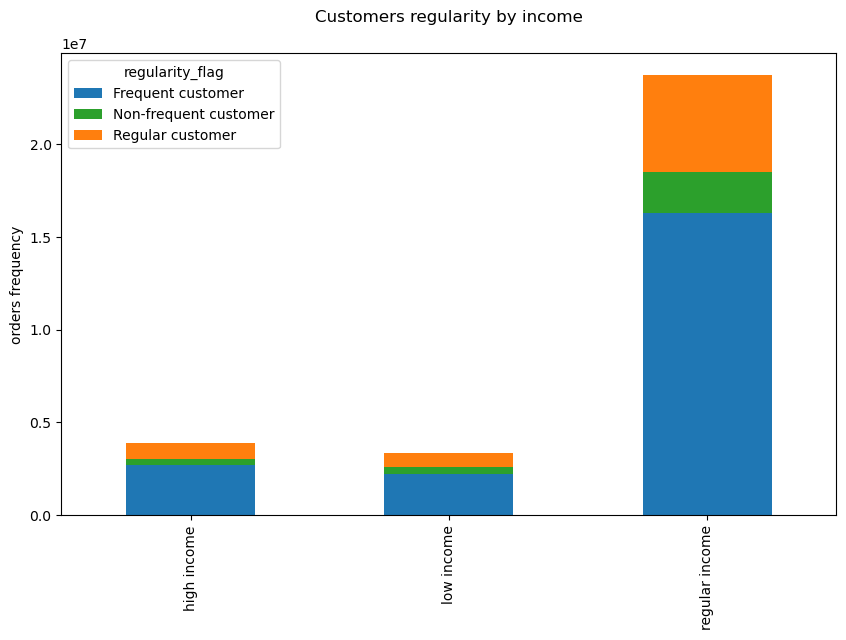

In [149]:
#visualizing customer regularity
bar = cross_earnings_regular.plot(kind='bar', stacked=True, color=['#1f77b4', '#2ca02c', '#ff7f0e'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Customers regularity by income', y=1.05)

In [150]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'regularity_earnings_bar.png'), bbox_inches='tight')

#### Observations:

##### Regular income customers groups are Instacart's most frequent customers in terms of regularity.

>> #### iii. Usage frequency

##### > Usage frequency

In [151]:
#usage frequency by income
df.groupby('earnings_flag')['days_since_prior_order'].agg(['min', 'max', 'mean'])

min   max       mean
earnings_flag                       
high income     0.0  30.0  10.684337
low income      0.0  30.0  11.175808
regular income  0.0  30.0  10.779425

In [152]:
#crossing usage frequency and earnings flags
cross_earnings_ords_freq = pd.crosstab(df['days_since_prior_order'], df['earnings_flag'])

In [153]:
cross_earnings_ords_freq

earnings_flag           high income  low income  regular income
days_since_prior_order                                         
0.0                           54875       56651          326485
1.0                          119315      102844          709531
2.0                          189175      141787         1120406
3.0                          242791      174004         1443019
4.0                          267612      195255         1594656
5.0                          269188      201809         1626486
6.0                          314929      255838         1907996
7.0                          418920      420598         2577921
8.0                          240177      201101         1452536
9.0                          150168      122087          918465
10.0                         118696      102345          722560
11.0                         100587       86453          610888
12.0                          94253       81075          575407
13.0                         102118       90551          630317
14.0                         122096      113314          755895
15.0                          79412       72618          493957
16.0                          55553       48044          338011
17.0                          45009       40737          279870
18.0                          42282       37719          256196
19.0                          39354       37073          242602
20.0                          44553       41106          275648
21.0                          50972       47504          321955
22.0                          35292       32913          224279
23.0                          26190       23805          162819
24.0                          22283       20453          140075
25.0                          21856       18656          129317
26.0                          21117       19116          126942
27.0                          23128       22851          144408
28.0                          29110       28349          178995
29.0                          20224       19487          123892
30.0                         329440      311738         2033191

Text(0.5, 1.05, 'Usage frequency by income')

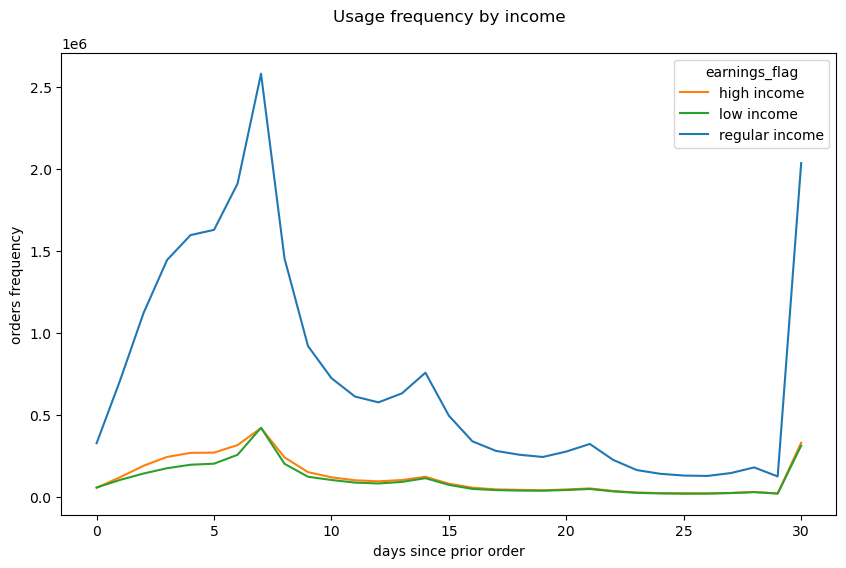

In [154]:
#visualizing usage frequency
line = cross_earnings_ords_freq.plot(kind='line', color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Usage frequency by income', y=1.05)

In [155]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'usage_frequency_earnings_line.png'))

#### Observations:

##### Similar to what we've seen with the demographic groups, most orders occur within 7 to 8 days from the previous orders, with a resurgence occuring within 30 days.

##### As we would expect, most Instacart orders comes from regular income customers and follows the exact behaviour we've seen with the demographic groups.

##### > Daily orders frequency

In [156]:
#daily orders frequency by income
df.groupby('earnings_flag')['orders_day_of_week'].agg(['min', 'max', 'mean'])

min  max      mean
earnings_flag                     
high income       0    6  2.749191
low income        0    6  2.752789
regular income    0    6  2.738500

In [157]:
#crossing demographics and daily orders frequency
cross_earnings_dow = pd.crosstab(df['orders_day_of_week'], df['earnings_flag'])

In [158]:
cross_earnings_dow

earnings_flag       high income  low income  regular income
orders_day_of_week                                         
0                        752600      510436         4645574
1                        669479      666627         4075580
2                        500874      478258         3045574
3                        459665      431491         2778379
4                        457000      419801         2748193
5                        503310      476066         3054353
6                        552347      379875         3359082

Text(0.5, 1.05, 'Daily orders frequency by income')

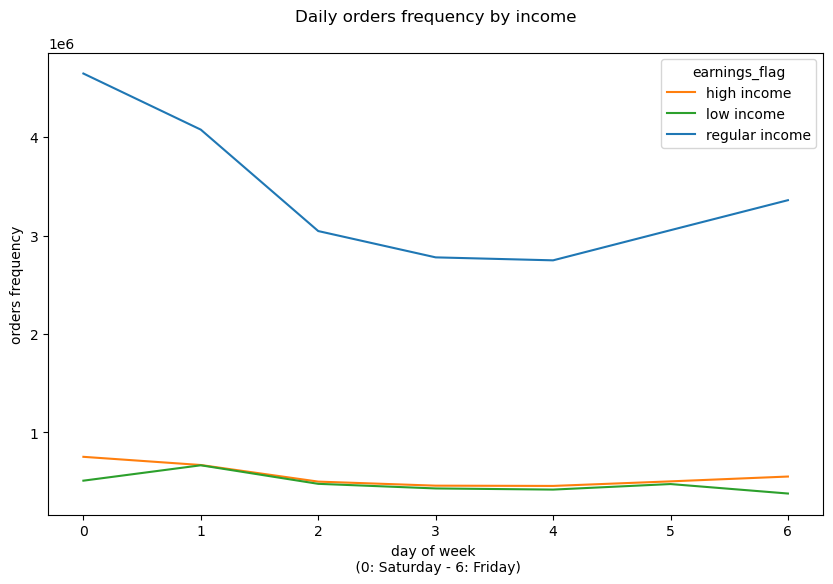

In [159]:
#visualizing daily orders frequency
line = cross_earnings_dow.plot(kind='line', color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
line.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
line.set_ylabel('orders frequency')
line.set_title('Daily orders frequency by income', y=1.05)

#### Observations:

##### As we've seen with the demographic groups, most orders, here as well, occur on Saturday and Sunday across regular income and high income customers groups.

##### Low income customers, however, exhibit a different behaviour this time, having most of their orders occuring on Sunday, and the least on Friday.

In [160]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'daily_orders_frequency_earnings_line.png'))

##### > Hourly orders frequency

In [161]:
#hourly orders by income
df.groupby('earnings_flag')['order_hour_of_day'].agg(['min', 'max', 'mean'])

min  max       mean
earnings_flag                      
high income       0   23  13.435341
low income        0   23  13.213969
regular income    0   23  13.434923

In [162]:
#crossing earnings and hourly orders frequency
cross_earnings_hod = pd.crosstab(df['order_hour_of_day'], df['earnings_flag'])

In [163]:
cross_earnings_hod

earnings_flag      high income  low income  regular income
order_hour_of_day                                         
0                        24847       21366          161829
1                        13333       11188           85100
2                         8432        7412           49847
3                         6384        5334           37078
4                         6696        5301           38766
5                        10583        8345           65490
6                        35401       26773          218839
7                       112291       84626          666296
8                       211414      180269         1267427
9                       297185      296865         1769561
10                      329158      330480         1990106
11                      322809      304608         1987463
12                      310087      270368         1915340
13                      317763      271066         1950447
14                      319678      270457         1977768
15                      319782      264444         1951740
16                      302713      256513         1854455
17                      250372      210411         1521562
18                      199779      158375         1193030
19                      153830      119542          920506
20                      118242       90733          721934
21                       97213       71364          594534
22                       78131       57004          471925
23                       49152       39710          295692

Text(0.5, 1.05, 'Hourly orders frequency by income')

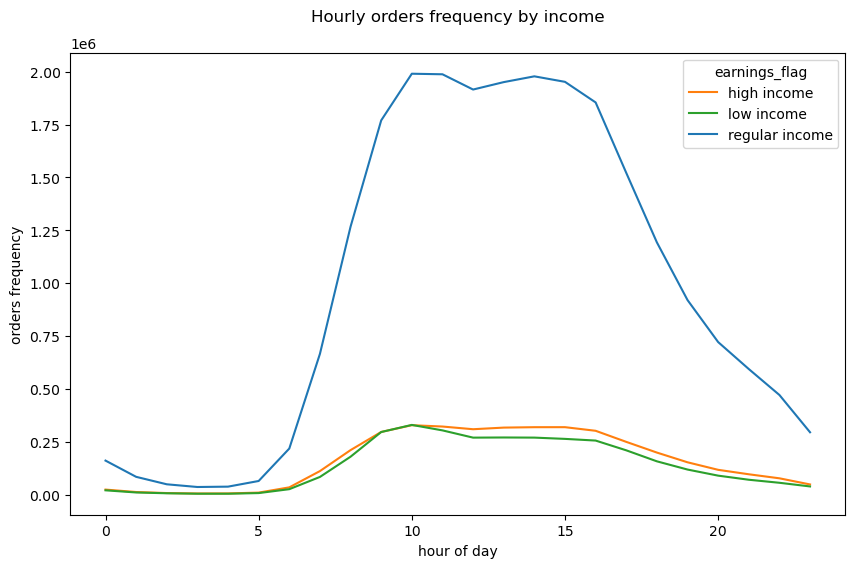

In [164]:
#visualizing hourly orders frequency
line = cross_earnings_hod.plot(kind='line', color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('orders frequency')
line.set_title('Hourly orders frequency by income', y=1.05)

In [165]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hourly_orders_frequency_earnings_line.png'))

>> #### iii. Departments and product types
>>> #### 1. Prices summary

In [166]:
#prices by income
df.groupby('earnings_flag')['prices'].agg(['min', 'max', 'mean'])

min   max      mean
earnings_flag                      
high income     1.0  25.0  7.940758
low income      1.0  25.0  6.707347
regular income  1.0  25.0  7.919593

In [167]:
cross_income_prices = pd.crosstab(df['prices'], df['earnings_flag'])

In [168]:
cross_income_prices

earnings_flag  high income  low income  regular income
prices                                                
1.0                  13604       12750           82908
1.1                  27755       35012          169570
1.2                  30934       30157          181590
1.3                  48223       61504          297416
1.4                  44154       51880          278765
...                    ...         ...             ...
24.6                   270          96            1479
24.7                   889         228            5910
24.8                    53          16             317
24.9                   975         177            4314
25.0                  1992         425           10711

[240 rows x 3 columns]

Text(0.5, 1.05, 'Average order prices by income')

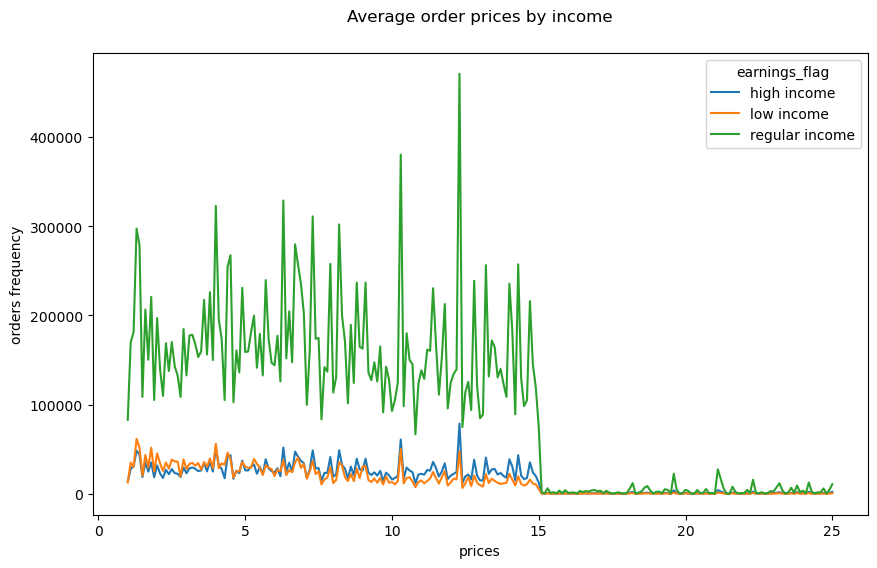

In [169]:
#visualizing prices by income
line = cross_income_prices.plot(kind='line', figsize=(10, 6))
line.set_xlabel('prices')
line.set_ylabel('orders frequency')
line.set_title('Average order prices by income', y=1.05)

>>> #### 2. Spending distribution

In [170]:
#crossing earnings and spending flags
cross_earnings_spending = pd.crosstab(df['earnings_flag'], df['spending_flag'])

In [171]:
cross_earnings_spending

spending_flag   High spender  Low spender
earnings_flag                            
high income           388904      3506371
low income              2026      3360528
regular income        212495     23494240

Text(0.5, 1.05, 'Spending distribution by income')

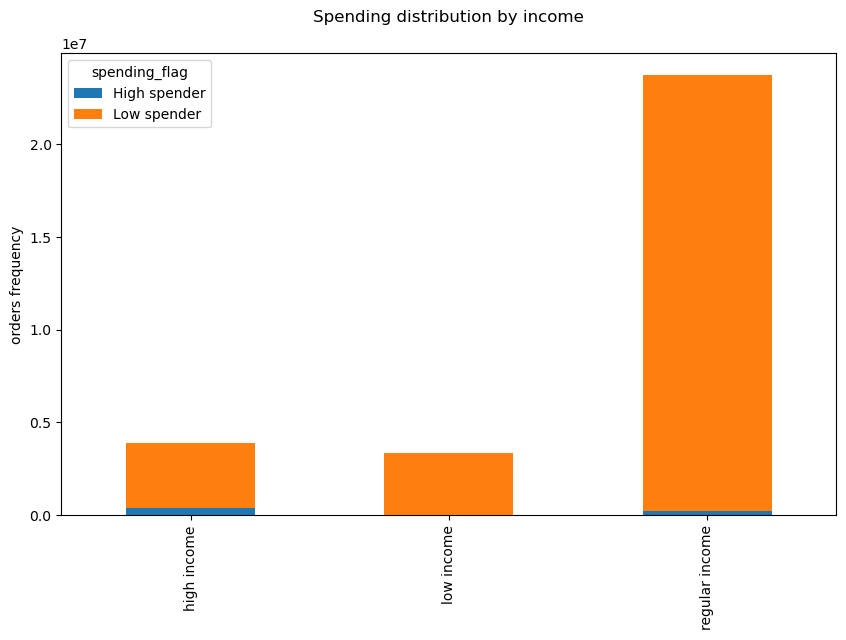

In [172]:
#visualizing spending habit
bar = cross_earnings_spending.plot(kind='bar', stacked=True, figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Spending distribution by income', y=1.05)

In [173]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'earnings_spenders_distribution_bar.png'), bbox_inches='tight')

Text(0.5, 1.05, 'High spenders distribution by income')

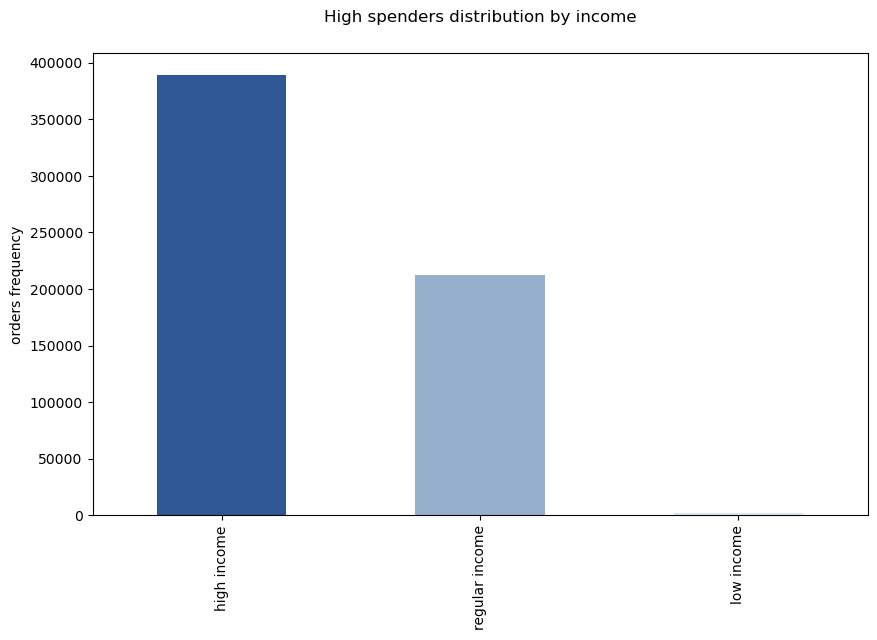

In [174]:
#visualizing high spenders by income
bar_high_spender = cross_earnings_spending['High spender'].sort_values(ascending=False).plot(kind='bar',
color=['#2E5894', '#96AFCD', '#DBE9F3'], figsize=(10, 6))
bar_high_spender.set_xlabel(None)
bar_high_spender.set_ylabel('orders frequency')
bar_high_spender.set_title('High spenders distribution by income', y=1.05)

In [175]:
#exporting chart
bar_high_spender.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'earnings_high_spenders_distribution_bar.png'), bbox_inches='tight')

#### Observations:

##### Although the majority of Instacart customers have regular income, the smaller proportion of customers with high income tend to spend nearly as double as regular income group. Interestingly though, while low income customers are expectedly the least Instacart high spenders, they do spend nearly as much as high income customers. 

>>> #### 3. Products price range

In [176]:
#crossing demographics and price range
cross_earnings_prices = pd.crosstab(df['price_range'], df['earnings_flag'])

In [177]:
cross_earnings_prices

earnings_flag       high income  low income  regular income
price_range                                                
High-range product        57128       17665          323160
Low-range product       1161971     1390774         7122095
Mid-range product       2676176     1954115        16261480

Text(0.5, 1.05, 'Products price range by income')

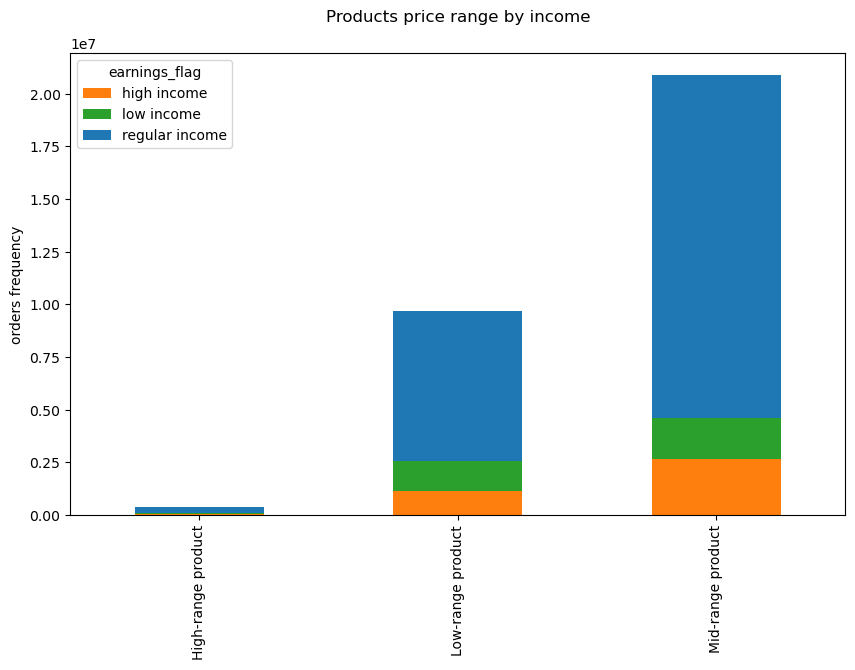

In [178]:
#visualizing products price range by income
bar = cross_earnings_prices.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Products price range by income', y=1.05)

In [179]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'earnings_products_price_range_bar.png'), bbox_inches='tight')

#### Observations:

##### As we've seen with the demographic groups, the majority Instacart's ordered products are mid range products across all earners as well. We also notice that low income customers group have more orders on low-range products than high-income customers.

>>> #### 4. Top departments

##### > Top departments by income

In [180]:
#crossing earnings and departments
cross_earnings_deps = pd.crosstab(df['department'], df['earnings_flag'])

In [181]:
cross_earnings_deps

earnings_flag    high income  low income  regular income
department                                              
alcohol                24067       18047          102513
babies                 53001       29240          328151
bakery                148444      106757          865627
beverages             313379      383121         1875401
breakfast              83422       91408          496020
bulk                    3671        4676           25104
canned goods          132414       78975          800685
dairy eggs            659249      502363         4015570
deli                  125893      106448          771493
dry goods pasta       106350       64481          651305
frozen                276434      215177         1630120
household              92680       87216          519961
international          32824       21636          201531
meat seafood           91522       34278          548981
missing                 8255        6547           49966
other                   4554        3886           25971
pantry                231937      166061         1384707
personal care          53531       47782          322993
pets                   12991        8612           71457
produce              1134852      826314         7118107
snacks                305805      559529         1901072

In [182]:
#sorting top departments
top_deps = cross_earnings_deps.apply(lambda x: x.nlargest(5), axis=0)

In [183]:
top_deps

earnings_flag  high income  low income  regular income
department                                            
beverages           313379      383121         1875401
dairy eggs          659249      502363         4015570
frozen              276434      215177         1630120
produce            1134852      826314         7118107
snacks              305805      559529         1901072

Text(0.5, 1.05, 'Top most popular departments by income')

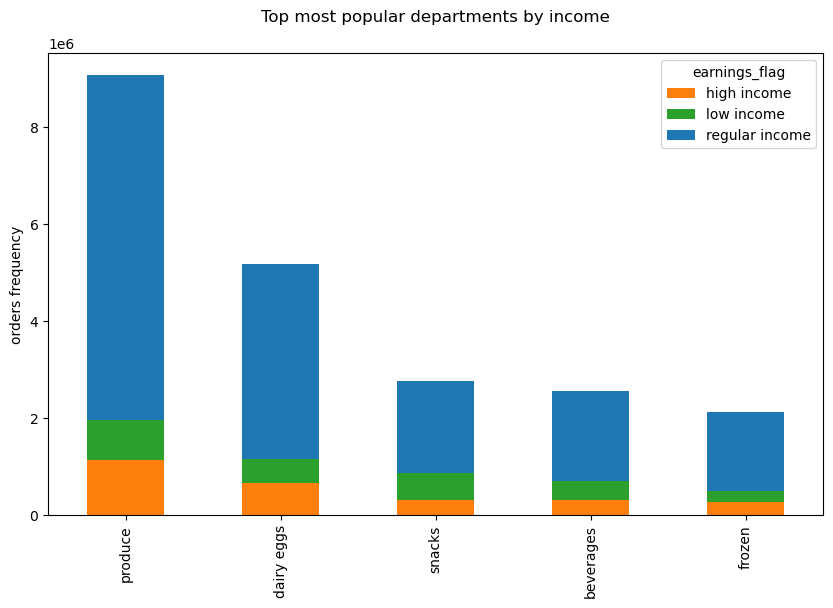

In [184]:
#visualizing top departments by income
bar = top_deps.sort_values(by=['regular income', 'high income', 'low income'], ascending=False).plot(kind='bar', stacked=True, 
color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Top most popular departments by income', y=1.05)

In [185]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'earnings_top_departments_bar.png'), bbox_inches='tight')

#### Observations:

##### As we've seen with the demographic groups, produce and dairy eggs remain the top most popular Instacart departments in terms of ordered products across all earnings groups as well, followed by snacks, beverages, and frozen.

##### Low income customers tend to spend more on snacks and beverages than high income cusomters.

>>> #### 5. Top products

##### > Top products by income

In [186]:
#products by income
df_products = df.groupby(['earnings_flag','product_name'])['order_number'].sum()

In [187]:
df_products

earnings_flag   product_name                                                   
high income     #2 Coffee Filters                                                  1586
                #2 Cone White Coffee Filters                                          8
                #2 Mechanical Pencils                                                 8
                #4 Natural Brown Coffee Filters                                     545
                #NAME?                                                               78
                                                                                   ... 
regular income  with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum     251
                with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum           570
                with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum             1046
                with a Splash of Mango Coconut Water                                267
                with a Splash of Pineapp

In [188]:
df_products = df_products.unstack(level=0)

In [189]:
df_top_products = df_products.nlargest(5, columns=['regular income', 'high income', 'low income'])

In [190]:
df_top_products

earnings_flag           high income  low income  regular income
product_name                                                   
Banana                    1064699.0    593966.0       6441388.0
Bag of Organic Bananas     968236.0    767861.0       5998659.0
Organic Strawberries       563548.0    393075.0       3687146.0
Organic Baby Spinach       540497.0    318577.0       3359028.0
Organic Hass Avocado       506284.0    371477.0       3254616.0

Text(0.5, 1.05, 'Top most popular products by income')

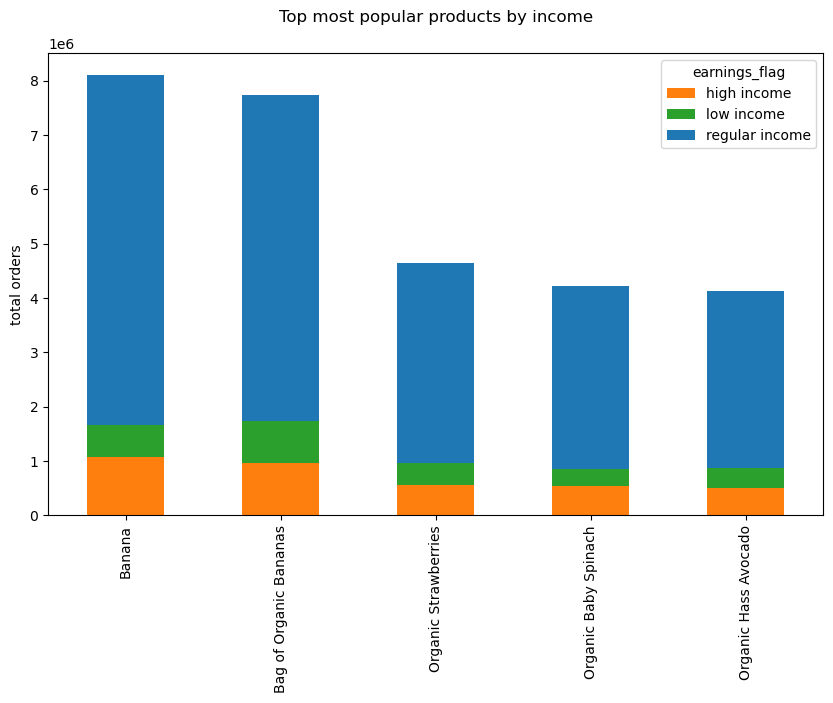

In [191]:
#visualizing top departments by income
bar = df_top_products.plot(kind='bar', stacked=True,
color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('total orders')
bar.set_title('Top most popular products by income', y=1.05)

In [192]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'earnings_top_products_bar.png'), bbox_inches='tight')

#### Observations:

##### As we've seen previously, the top most popular Instacart products remain the same across the board.

#### Summary:

##### So far, the data have shown how Instacart customers, across all demographic groups and incomes, exhibit a similar behaviour and a consistent pattern in terms their ordering frequency, products preferences and spending habits. 

##### The last section of this analysis will look into this behaviour across the US regions to validate our findings.

> #### h. Visualizing ordering and spending habits by region

##### > Products price range by region

In [193]:
#crossing price range and region
cross_region_prices = pd.crosstab(df['price_range'], df['region'])

In [194]:
cross_region_prices

region              Midwest  Northeast    South     West
price_range                                             
High-range product    93280      69732   132661   102280
Low-range product   2267085    1712360  3217500  2477895
Mid-range product   4901148    3682593  6960978  5347052

Text(0.5, 1.05, 'Products price range by region')

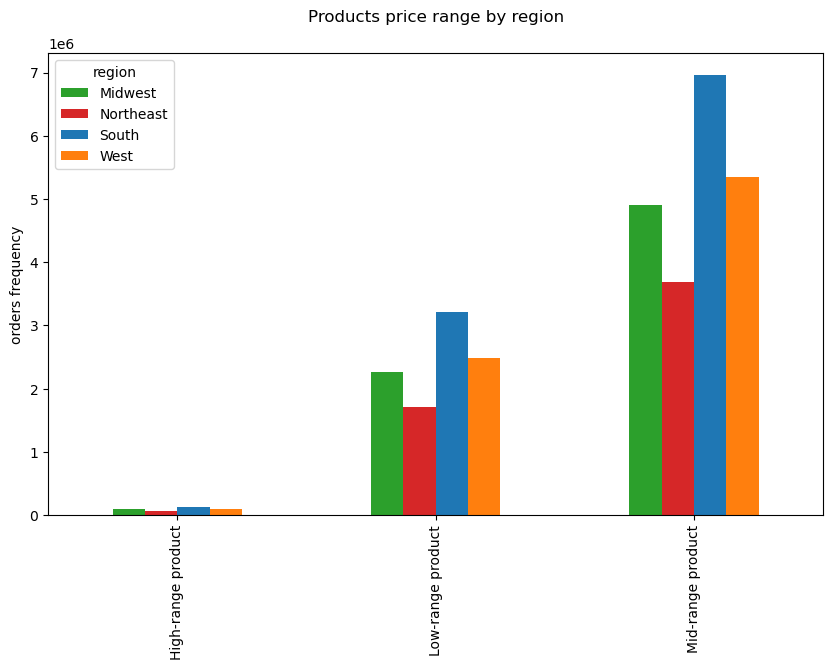

In [195]:
#visualizing products price range
bar = cross_region_prices.plot(kind='bar', color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Products price range by region', y=1.05)

In [196]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_product_price_range_bar.png'), bbox_inches='tight')

##### > Top departments by region

In [197]:
top_deps_region = df.groupby(['region', 'department'])['order_number'].sum()

In [198]:
top_deps_region = top_deps_region.unstack(level=0)

In [199]:
top_deps_region

region            Midwest  Northeast     South      West
department                                              
alcohol            550842     405462    778565    584113
babies            1893168    1406505   2814920   2038702
bakery            4571470    3597052   6635755   5209922
beverages        10521065    8422198  15367855  11729713
breakfast         2678215    2076263   3883339   3081924
bulk               167876     116556    224816    186451
canned goods      3931489    3026949   5736809   4443070
dairy eggs       21848543   16929055  31703248  24389435
deli              4008871    3070168   5686434   4445062
dry goods pasta   3160092    2379969   4535146   3599397
frozen            7947523    5912025  11531424   8897768
household         2711466    2100495   3743061   2949867
international     1013272     773009   1445583   1164703
meat seafood      2591472    1968315   3705397   2920600
missing            376993     284687    519174    391799
other              141838     113855    215048    151977
pantry            7230849    5461911  10205536   7992985
personal care     1699691    1275955   2390894   1818400
pets               335287     308402    467629    377263
produce          39025162   29482700  56077810  43342106
snacks           11417981    8825241  16330473  12752302

In [200]:
top_deps_region = top_deps_region.nlargest(5, columns=['Midwest', 'Northeast', 'South', 'West'])

In [201]:
top_deps_region

region       Midwest  Northeast     South      West
department                                         
produce     39025162   29482700  56077810  43342106
dairy eggs  21848543   16929055  31703248  24389435
snacks      11417981    8825241  16330473  12752302
beverages   10521065    8422198  15367855  11729713
frozen       7947523    5912025  11531424   8897768

Text(0.5, 1.05, 'Top most popular departments by region')

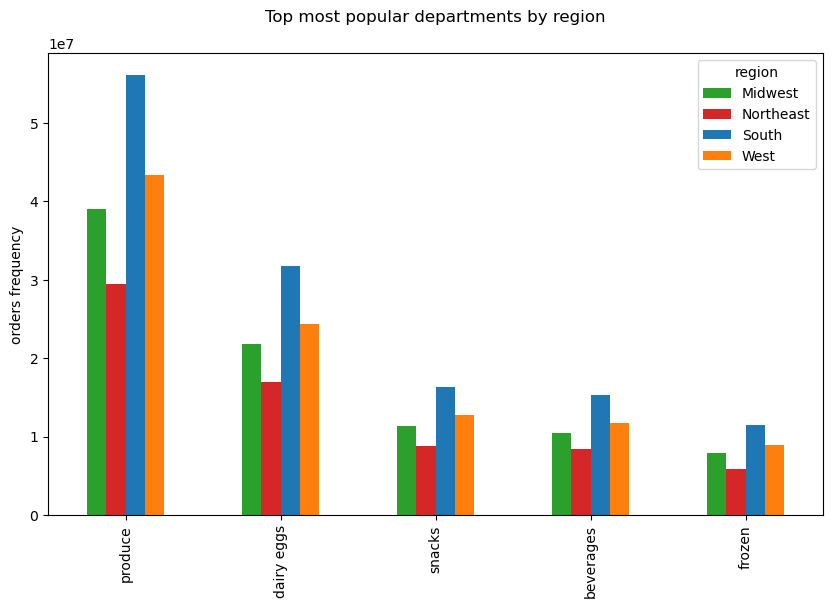

In [202]:
#visualizing top departments by region
bar = top_deps_region.plot(kind='bar', color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Top most popular departments by region', y=1.05)

In [203]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_top_departments_bar.png'), bbox_inches='tight')

##### > Top products by region

In [204]:
top_prod_region = df.groupby(['region', 'product_name'])['order_number'].sum()

In [205]:
top_prod_region = top_prod_region.unstack(level=0)

In [206]:
top_prod_region

region                                              Midwest  Northeast  \
product_name                                                             
#2 Coffee Filters                                    4265.0     2429.0   
#2 Cone White Coffee Filters                          101.0       60.0   
#2 Mechanical Pencils                                  46.0       25.0   
#4 Natural Brown Coffee Filters                       776.0      434.0   
#NAME?                                                 54.0       93.0   
...                                                     ...        ...   
with Xylitol Unwrapped Original Flavor 50 Stick...    100.0      118.0   
with Xylitol Unwrapped Spearmint 50 Sticks Suga...    140.0      117.0   
with Xylitol Watermelon Twist 18 Sticks Sugar F...    223.0      492.0   
with a Splash of Mango Coconut Water                   19.0       98.0   
with a Splash of Pineapple Coconut Water              174.0      243.0   

region                                               South    West  
product_name                                                        
#2 Coffee Filters                                   4289.0  3971.0  
#2 Cone White Coffee Filters                          21.0    34.0  
#2 Mechanical Pencils                                 14.0    51.0  
#4 Natural Brown Coffee Filters                     1472.0  1669.0  
#NAME?                                               139.0    78.0  
...                                                    ...     ...  
with Xylitol Unwrapped Original Flavor 50 Stick...    60.0   949.0  
with Xylitol Unwrapped Spearmint 50 Sticks Suga...   198.0   403.0  
with Xylitol Watermelon Twist 18 Sticks Sugar F...   375.0   302.0  
with a Splash of Mango Coconut Water                 122.0    51.0  
with a Splash of Pineapple Coconut Water             485.0    40.0  

[49630 rows x 4 columns]

In [207]:
top_prod_region = top_prod_region.nlargest(5, columns=['Midwest', 'Northeast', 'South', 'West'])

Text(0.5, 1.05, 'Top most popular products by region')

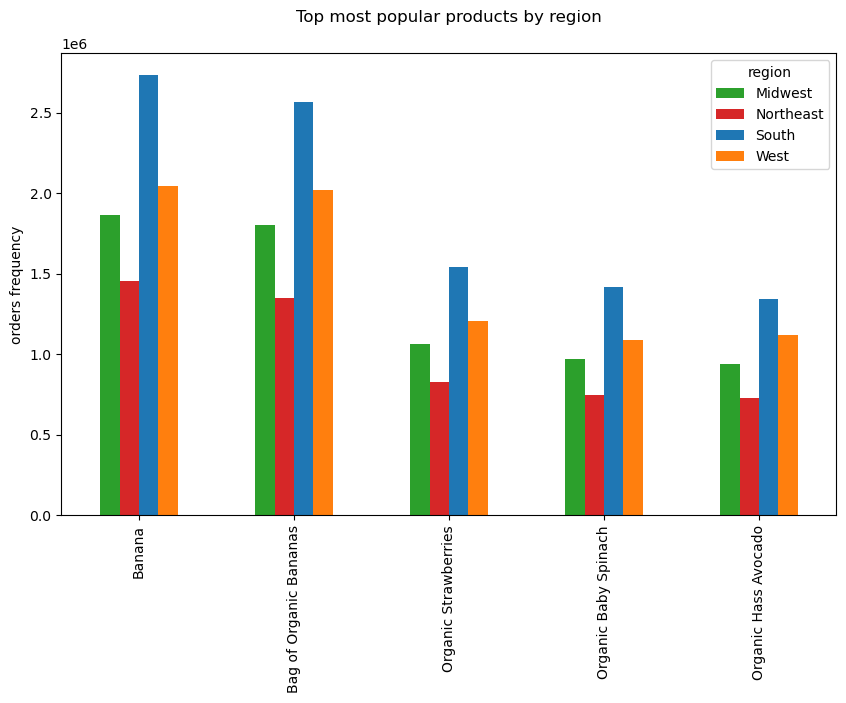

In [208]:
#visualizing top products by region
bar = top_prod_region.plot(kind='bar', color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('orders frequency')
bar.set_title('Top most popular products by region', y=1.05)

In [209]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_top_products_bar.png'), bbox_inches='tight')

##### > Usage frequency by region

In [210]:
#crossing orders frequency and region
cross_region_ord_freq = pd.crosstab(df['days_since_prior_order'], df['region'])

In [211]:
cross_region_ord_freq

region                  Midwest  Northeast    South    West
days_since_prior_order                                     
0.0                      101723      78327   147314  110647
1.0                      216468     164192   307634  243396
2.0                      336823     255708   486023  372814
3.0                      427568     334826   620523  476897
4.0                      472595     367607   684480  532841
5.0                      485940     373064   698505  539974
6.0                      575736     434156   828053  640818
7.0                      803705     604782  1130052  878900
8.0                      446560     331026   630418  485810
9.0                      279627     209531   399058  302504
10.0                     220030     166652   314959  241960
11.0                     186805     139821   266393  204909
12.0                     177714     132493   248778  191750
13.0                     197834     144760   273759  206633
14.0                     237122     173336   328037  252810
15.0                     151683     114409   215381  164514
16.0                     103769      78423   148109  111307
17.0                      85583      65408   120892   93733
18.0                      78731      58984   112181   86301
19.0                      77095      57063   105272   79599
20.0                      85063      63287   119287   93670
21.0                      98767      73515   139433  108716
22.0                      69402      52634    96852   73596
23.0                      51650      36420    70311   54433
24.0                      43326      31243    61379   46863
25.0                      39802      29852    56361   43814
26.0                      38386      30032    56468   42289
27.0                      45264      31674    63388   50061
28.0                      56968      41652    80234   57600
29.0                      38899      29586    54106   41012
30.0                     637781     468398   893233  674957

Text(0.5, 1.05, 'Usage frequency by region')

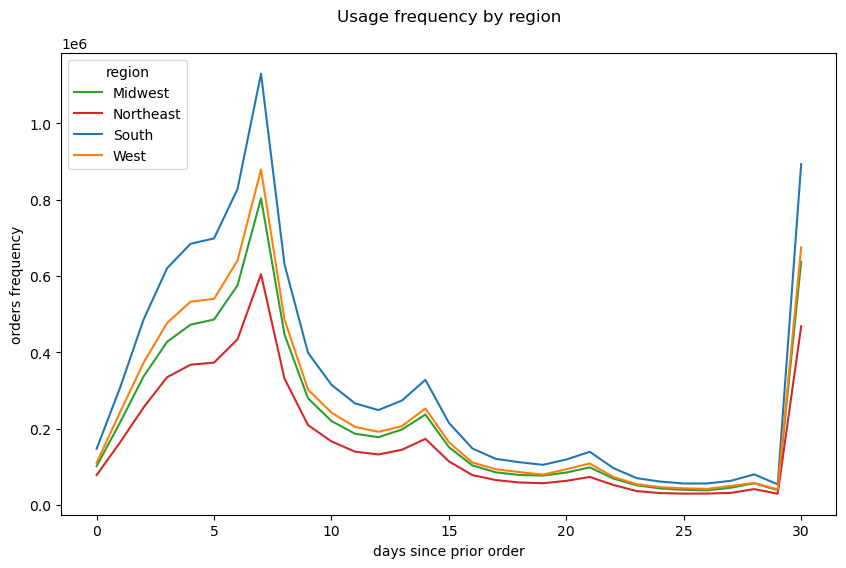

In [212]:
#visualizing usage frequency by region
line = cross_region_ord_freq.plot(kind='line', color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Usage frequency by region', y=1.05)

In [213]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_usage_frequency_line.png'))

#### > Daily orders by region

In [214]:
#crossing daily orders and region
cross_region_dow = pd.crosstab(df['orders_day_of_week'], df['region'])

In [215]:
cross_region_dow

region              Midwest  Northeast    South     West
orders_day_of_week                                      
0                   1390189    1043698  1955352  1519371
1                   1263655     954332  1808348  1385351
2                    947370     713159  1340387  1023790
3                    855316     649305  1229002   935912
4                    851501     637781  1205497   930215
5                    943396     716128  1342849  1031356
6                   1010086     750282  1429704  1101232

Text(0.5, 1.05, 'Daily orders by region')

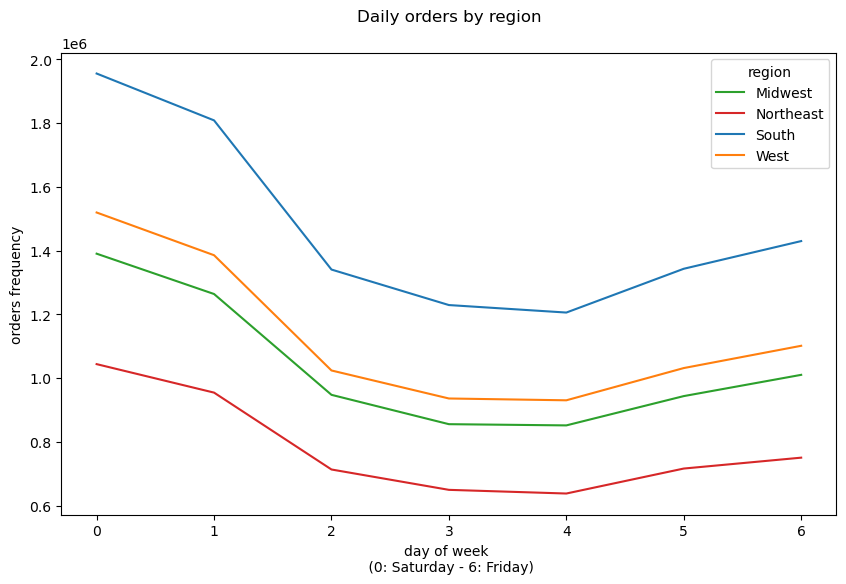

In [216]:
#visualizing daily orders by region
line = cross_region_dow.plot(kind='line', color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 6))
line.set_xlabel('day of week \n (0: Saturday - 6: Friday)')
line.set_ylabel('orders frequency')
line.set_title('Daily orders by region', y=1.05)

In [217]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_daily_orders_line.png'))

#### > Hourly orders by region

In [218]:
#crossing hourly orders and region
cross_region_hod = pd.crosstab(df['order_hour_of_day'], df['region'])

In [219]:
cross_region_hod

region             Midwest  Northeast   South    West
order_hour_of_day                                    
0                    48192      36600   69767   53483
1                    25879      20529   35769   27444
2                    16136      11842   20668   17045
3                    11298       8843   16458   12197
4                    12015       9043   17277   12428
5                    19061      14733   29571   21053
6                    64885      49025   95583   71520
7                   201794     154031  288357  219031
8                   384854     294134  559785  420337
9                   552468     414092  791570  605481
10                  621555     464454  885590  678145
11                  614330     461204  867995  671351
12                  583145     443358  827945  641347
13                  589852     450628  840883  657913
14                  596442     454392  851916  665153
15                  598686     447558  839925  649797
16                  568750     424062  800862  620007
17                  467191     348360  659238  507556
18                  368875     272247  515725  394337
19                  281563     207531  401485  303299
20                  220518     162856  309210  238325
21                  181038     134541  256209  191323
22                  144637     108988  200322  153113
23                   88349      71634  129029   95542

Text(0.5, 1.05, 'Hourly orders by region')

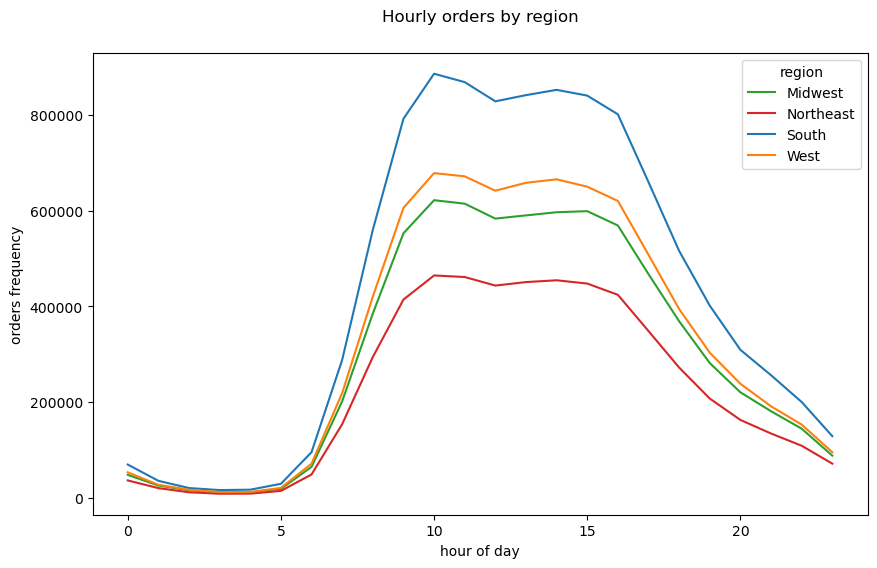

In [220]:
#visualizing hourly order by region
line = cross_region_hod.plot(kind='line', color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('orders frequency')
line.set_title('Hourly orders by region', y=1.05)

In [221]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_hourly_orders_line.png'))

#### Observation:

##### As we've expected, the data shows that Instacart customers behaviour remains consistent across all US regions as well, in terms of their ordering and spening habits, and products preferences.

#### remaining questions

> ##### Are there differences in ordering habits based on a customer’s loyalty status?

In [222]:
#departments by loyalty flag
cross_loyalty_deps = pd.crosstab(df['department'], df['loyalty_flag'])

In [223]:
cross_loyalty_deps

loyalty_flag     Loyal customer  New customer  Regular customer
department                                                     
alcohol                   38723         28629             77275
babies                   167108         46708            196576
bakery                   379873        172104            568851
beverages                855017        396649           1320235
breakfast                221577        106179            343094
bulk                      13834          4149             15468
canned goods             294594        180196            537284
dairy eggs              1830707        750056           2596419
deli                     324046        158335            521453
dry goods pasta          242580        144836            434720
frozen                   609460        372271           1140000
household                196873        128117            374867
international             78394         43841            133756
meat seafood             202480        112464            359837
missing                   18350         12713             33705
other                     10715          5839             17857
pantry                   560402        299576            922727
personal care            123365         75442            225499
pets                      25469         15880             51711
produce                 3147376       1336604           4595293
snacks                   943150        413107           1410149

In [224]:
cross_loyalty_deps = cross_loyalty_deps.nlargest(5, columns=['Regular customer', 'Loyal customer', 'New customer'])

Text(0.5, 1.05, 'Top most popular department by loyalty status')

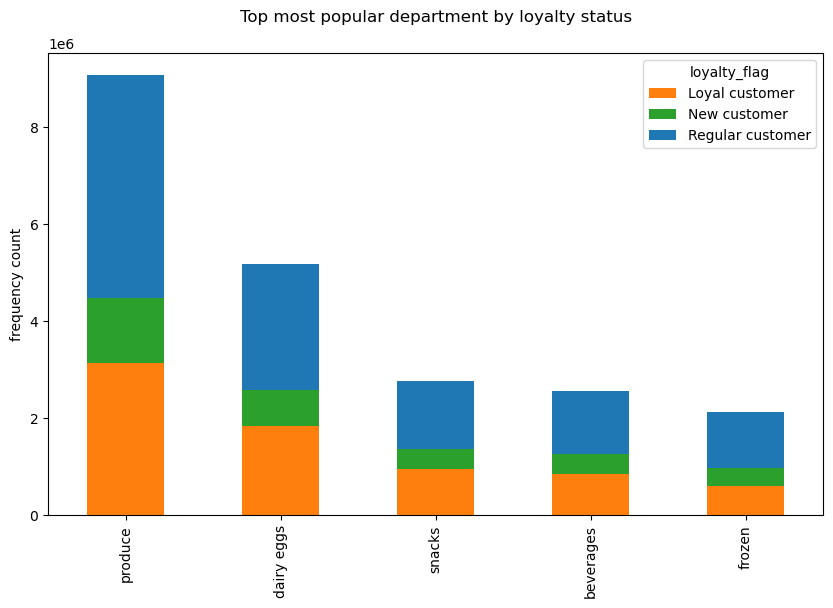

In [225]:
bar = cross_loyalty_deps.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
bar.set_xlabel(None)
bar.set_ylabel('frequency count')
bar.set_title('Top most popular department by loyalty status', y=1.05)

In [226]:
#exporting chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_top_deparment_bar.png'), bbox_inches='tight')

In [227]:
#Usage frequency by loyalty flag
cross_loyalty_freq = pd.crosstab(df['days_since_prior_order'], df['loyalty_flag'])

In [228]:
cross_loyalty_freq

loyalty_flag            Loyal customer  New customer  Regular customer
days_since_prior_order                                                
0.0                             239649         40517            157845
1.0                             626159         43354            262177
2.0                             973214         60662            417492
3.0                            1185968         86136            587710
4.0                            1202971        107496            747056
5.0                            1074717        136069            886697
6.0                            1090986        191359           1196418
7.0                            1351314        291064           1775061
8.0                             643383        185317           1065114
9.0                             347725        133335            709660
10.0                            247991        112535            583075
11.0                            184155        105171            508602
12.0                            151544        109366            489825
13.0                            136552        133357            553077
14.0                            147364        168474            675467
15.0                             89470        115435            441082
16.0                             57659         82193            301756
17.0                             44725         72056            248835
18.0                             37008         68874            230315
19.0                             31115         68200            219714
20.0                             32357         81275            247675
21.0                             33447        102117            284867
22.0                             23358         69966            199160
23.0                             15475         54568            142771
24.0                             12993         47454            122364
25.0                             11561         45103            113165
26.0                              9099         47515            110561
27.0                              9974         55730            124683
28.0                             11648         72612            152194
29.0                              7137         50638            105828
30.0                             64663       1188261           1421445

Text(0.5, 1.05, 'Usage frequency by loyalty status')

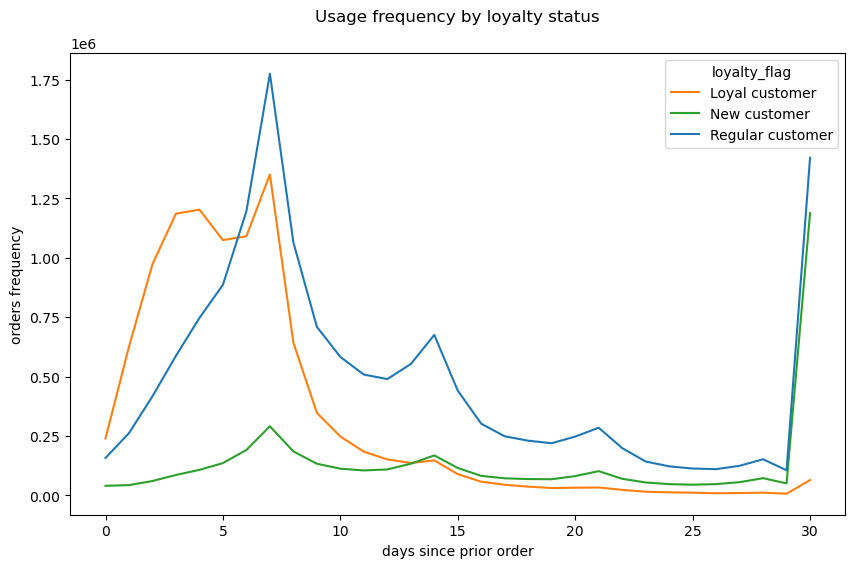

In [229]:
line = cross_loyalty_freq.plot(kind='line', color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
line.set_xlabel('days since prior order')
line.set_ylabel('orders frequency')
line.set_title('Usage frequency by loyalty status', y=1.05)

In [230]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_orders_frequency.png'), bbox_inches='tight')

In [231]:
#daily orders by loyalty flag
cross_loyalty_dow = pd.crosstab(df['orders_day_of_week'], df['loyalty_flag'])

In [232]:
cross_loyalty_dow

loyalty_flag        Loyal customer  New customer  Regular customer
orders_day_of_week                                                
0                          1754731        984879           3169000
1                          1843401        818902           2749383
2                          1352343        625288           2047075
3                          1266495        560418           1842622
4                          1292042        535931           1797021
5                          1456715        587718           1989296
6                          1318366        690559           2282379

Text(0.5, 1.05, 'Daily orders by loyalty status')

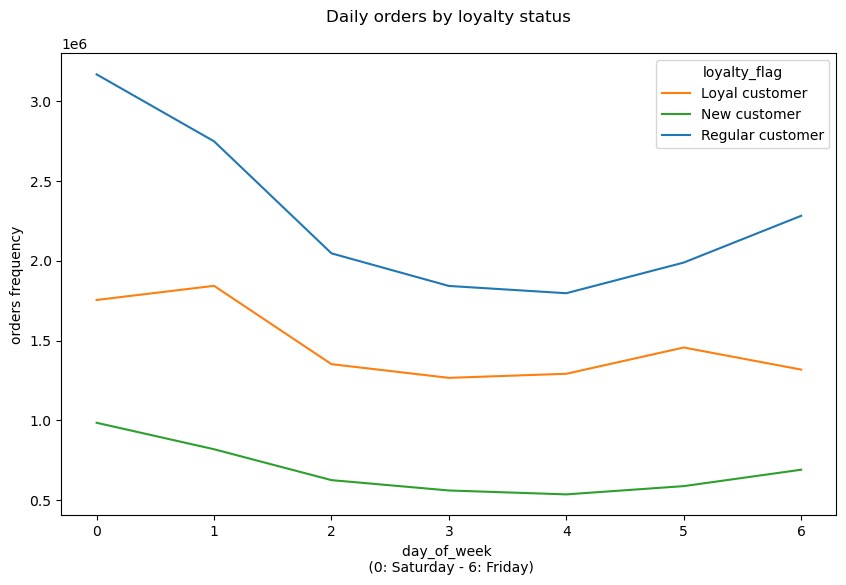

In [233]:
line = cross_loyalty_dow.plot(kind='line', color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
line.set_xlabel('day_of_week \n (0: Saturday - 6: Friday)')
line.set_ylabel('orders frequency')
line.set_title('Daily orders by loyalty status', y=1.05)

In [234]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_orders_frequency.png'), bbox_inches='tight')

In [235]:
#hourly orders by loyalty flag
cross_loyalty_how = pd.crosstab(df['order_hour_of_day'], df['loyalty_flag'])

In [236]:
cross_loyalty_how

loyalty_flag       Loyal customer  New customer  Regular customer
order_hour_of_day                                                
0                           61748         35311            110983
1                           30179         20674             58768
2                           17788         12241             35662
3                           13374          9510             25912
4                           16882          8442             25439
5                           29350         12475             42593
6                          112865         33901            134247
7                          346694        102170            414349
8                          643895        208124            807091
9                          882740        313143           1167728
10                         937669        382409           1329666
11                         873024        402684           1339172
12                         807001        394610           1294184
13                         824465        409847           1304964
14                         835162        409947           1322794
15                         809777        414283           1311906
16                         743761        403735           1266185
17                         584602        343519           1054224
18                         449336        270607            831241
19                         360292        204772            628814
20                         309270        147337            474302
21                         264537        112588            385986
22                         206150         91484            309426
23                         123532         59882            201140

Text(0.5, 1.05, 'Hourly orders by loyalty status')

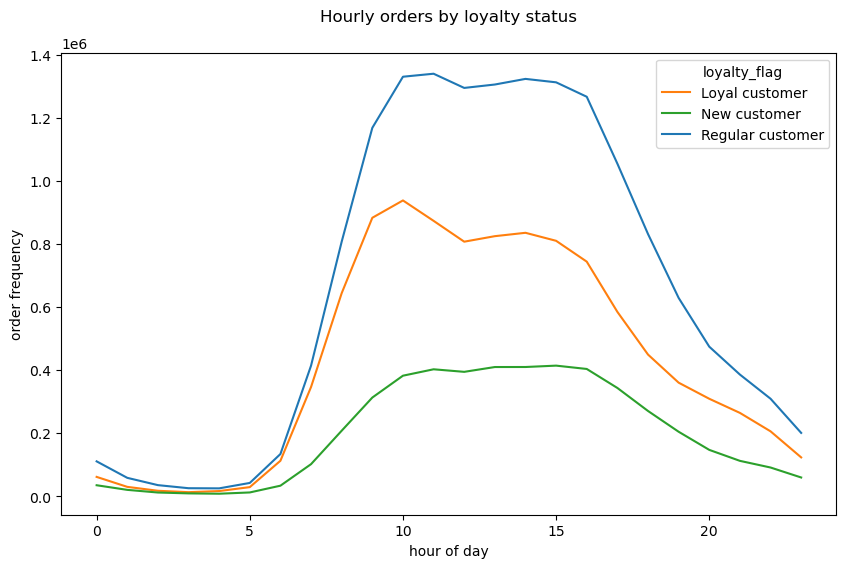

In [237]:
line = cross_loyalty_how.plot(kind='line', color=['#ff7f0e', '#2ca02c', '#1f77b4'], figsize=(10, 6))
line.set_xlabel('hour of day')
line.set_ylabel('order frequency')
line.set_title('Hourly orders by loyalty status', y=1.05)

In [238]:
#exporting chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_hourly_orders_line.png'), bbox_inches='tight')